In [ ]:
# pip install -U scikit-learn

# Стоимость поддержанного автомобиля


Описание задачи
Многие знают про маркетплейсы где продаются б/у вещи, на которых есть возможность недорого купить качественную и полезную вещь. Но всегда волнует вопрос - кто и как устанавливает цену, и какие его характеристики больше всего влияют на итоговую стоимость продажи?! Вопрос становиться особо актуальным, если речь идет про дорогие товары, например про автомобили!
Предлагаем вам принять участие в Мастерской, в рамках которой вы сможете поработать с данными о продажах автомобилей на вторичном рынке. Целью вашего проекта будет разработанная модель предсказания стоимости автомобиля на вторичном рынке.

В ходе работы в пройдете все основные этапы полноценного исследования:
* загрузка и ознакомление с данными,
* предварительная обработка,
* полноценный разведочный анализ,
* разработка новых синтетических признаков,
* проверка на мультиколлинеарность,
* отбор финального набора обучающих признаков,
* выбор и обучение моделей,
* итоговая оценка качества предсказания лучшей модели,
* анализ важности ее признаков.

Дополнительное задание
Для тех, кому этого покажется мало у нас есть дополнительное задание — создать web-приложения прототип вашей модели, используя библиотеку Streamlit.
Подготовка отчета по исследованию. Если останется время можно подготовить полноценный отчет по исследовательской работе Дата Сайнтиста. Примеры хороших отчетов можно посмотреть на сайте Stanford University - отчеты по финальным проектам направления Machine Learning - https://cs229.stanford.edu/projects2014.html. Из примеров понятно наполнение отчета по исследованию, а так же, что главное - понятна сама структура отчета. В реальной работе именно такой формат отчета обычно завершает исследование.
Мастерская будет проходить в виде соревнования на платформе Kaggle. Длительность — 2 недели. Для участников — это отличная возможность не только выполнить интересный проект, который можно будет добавить в свое портфолио, но и познакомиться с одной из самых популярных соревновательных Интернет-площадок, на которой можно исследовать и создавать модели, взаимодействовать с другими специалистами по данным, организовывать и участвовать в конкурсах, посвященных анализу данных и машинному обучению

## Загрузка данных.

Загрузим данные и посмотрим общзую информацию о них.

In [ ]:
# pip install catboost

In [ ]:
# pip install ipywidgets

In [ ]:
# jupyter nbextension enable --py widgetsnbextension

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
from numpy.random import RandomState
from scipy import stats as st


from datetime import datetime



from numpy.random import RandomState


import math
from sklearn.model_selection import cross_val_score






from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder


import statistics
from sklearn.metrics import mean_absolute_percentage_error as mape

from sklearn.model_selection import GridSearchCV


from catboost import Pool, CatBoostRegressor

In [3]:
data_train = pd.read_csv('./train.csv')

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440236 non-null  int64  
 1   make          432193 non-null  object 
 2   model         432113 non-null  object 
 3   trim          431899 non-null  object 
 4   body          429843 non-null  object 
 5   transmission  388775 non-null  object 
 6   vin           440236 non-null  object 
 7   state         440236 non-null  object 
 8   condition     430831 non-null  float64
 9   odometer      440167 non-null  float64
 10  color         439650 non-null  object 
 11  interior      439650 non-null  object 
 12  seller        440236 non-null  object 
 13  sellingprice  440236 non-null  int64  
 14  saledate      440236 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 50.4+ MB


In [5]:
data_train.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)


In [6]:
data_test = pd.read_csv('./test.csv')

In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          110058 non-null  int64  
 1   make          107997 non-null  object 
 2   model         107979 non-null  object 
 3   trim          107944 non-null  object 
 4   body          107464 non-null  object 
 5   transmission  97047 non-null   object 
 6   vin           110058 non-null  object 
 7   state         110058 non-null  object 
 8   condition     107679 non-null  float64
 9   odometer      110039 non-null  float64
 10  color         109900 non-null  object 
 11  interior      109900 non-null  object 
 12  seller        110058 non-null  object 
 13  saledate      110058 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 11.8+ MB


In [8]:
data_test.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2005,Cadillac,CTS,Base,Sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
1,2014,GMC,Savana Cargo,2500,Van,NaN,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,Fri Feb 27 2015 01:00:00 GMT-0800 (PST)
2,2013,Nissan,Murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,Tue Feb 24 2015 01:30:00 GMT-0800 (PST)
3,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015 02:00:00 GMT-0800 (PST)
4,2013,Nissan,Titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT)


In [9]:
data_sample_submission = pd.read_csv('./sample_submission.csv')

In [10]:
data_sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   vin           110058 non-null  object 
 1   sellingprice  110058 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.7+ MB


In [11]:
data_sample_submission.head()

,vin,sellingprice
0,1g6dp567450124779,13592.209588
1,1gtw7fca7e1902207,13592.209588
2,jn8az1mw6dw303497,13592.209588
3,2g1wf5e34d1160703,13592.209588
4,1n6aa0ec3dn301209,13592.209588


**Вывод:**


## Предобработка данных

### Проверка типов данных

**Вывод**

Все типы данныех во всех признаках соответсвуют логике данных.

### Обработка пропусков в данных

#### Заполнение пропусков в 'color' и 'interior'

In [12]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0: 'gap'})
            .query('gap > 0')
            .sort_values(by='gap', ascending=True)
            .plot(kind='barh', figsize=(15, 5), grid=True, legend=False, fontsize=16)
            .set_title(f'Процент пропусков в каждом признаке', fontsize=20)
        );
    except:
        print('Пропусков не осталось или произошла ошибка в первой части функции ')

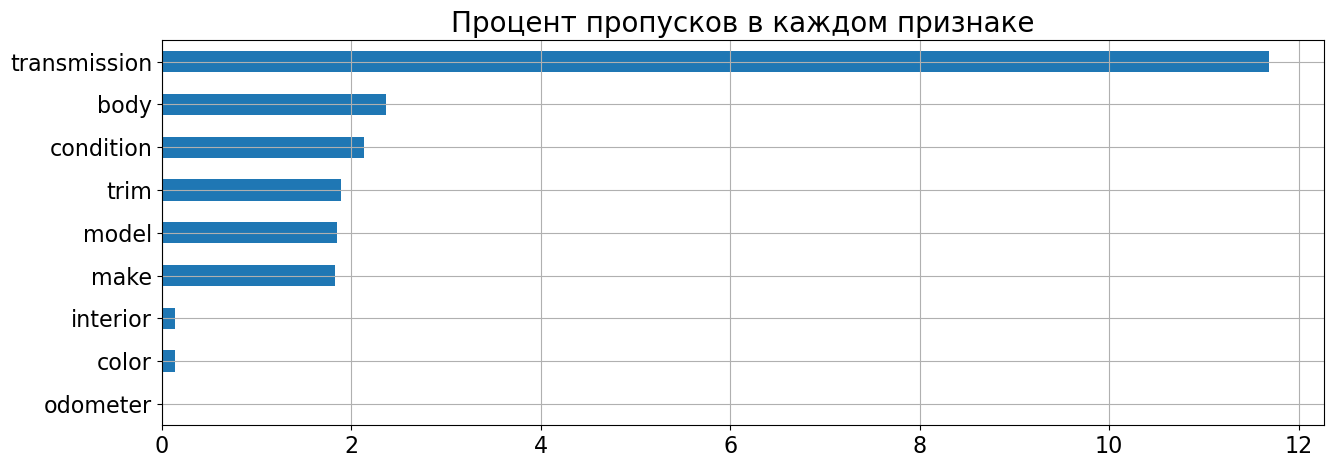

In [13]:
pass_value_barh(data_train)

Небольшой процент пропусков в признаках 'color' и 'interior' заполним модой.

In [14]:
data_train['color'].value_counts(), data_train['interior'].value_counts()

(black        87115
 white        84149
 silver       65667
 gray         65284
 blue         40237
 red          34514
 —            19520
 green         8975
 gold          8934
 beige         7257
 burgundy      7059
 brown         5320
 orange        1629
 purple        1250
 off-white     1143
 yellow         979
 charcoal       389
 turquoise      183
 pink            32
 lime            14
 Name: color, dtype: int64,
 black        192442
 gray         140843
 beige         46878
 tan           34709
 —             13563
 brown          6818
 red            1070
 blue            885
 silver          844
 off-white       373
 purple          276
 gold            256
 white           215
 green           198
 burgundy        155
 orange          109
 yellow           16
 Name: interior, dtype: int64)

In [15]:
data_train['interior'] = data_train['interior'].fillna(statistics.mode(data_train['interior']))
data_train['color'] = data_train['color'].fillna(statistics.mode(data_train['color']));

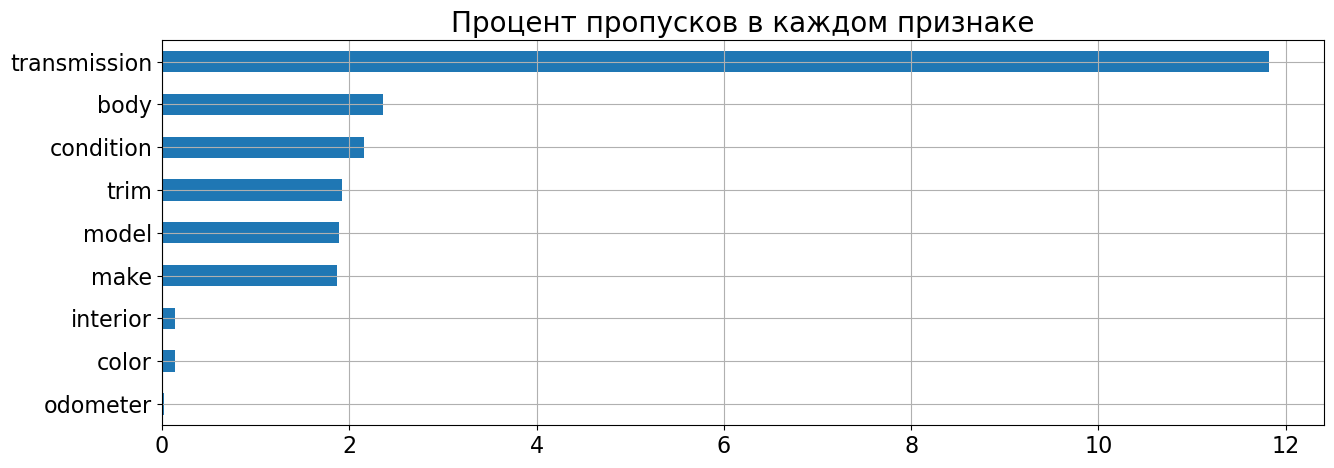

In [16]:
pass_value_barh(data_test)

In [17]:
data_test['color'].value_counts(), data_test['interior'].value_counts()

(black        22006
 white        20928
 silver       16360
 gray         16348
 blue         10180
 red           8384
 —             4948
 green         2270
 gold          2207
 beige         1826
 burgundy      1759
 brown         1300
 orange         407
 purple         284
 off-white      275
 yellow         274
 charcoal        84
 turquoise       49
 pink            10
 lime             1
 Name: color, dtype: int64,
 black        48176
 gray         34984
 beige        11931
 tan           8658
 —             3380
 brown         1664
 red            264
 blue           241
 silver         225
 off-white      107
 gold            64
 purple          58
 green           44
 burgundy        34
 orange          33
 white           33
 yellow           4
 Name: interior, dtype: int64)

In [18]:
data_test['interior'] = data_test['interior'].fillna(statistics.mode(data_test['interior']))
data_test['color'] = data_test['color'].fillna(statistics.mode(data_test['color']));

#### Заполнение пропусков в "transmission"

Почти 12% пропусков в признаке 'transmission' - характеристика коробки передач (механика или автомат). Для заполнения пропусков в этом столбце будем исходить из предположения , что для одних и тех же производителей и моделей машин, механическая коробка передач будет всегда стоить дешевле. Сгруппируем данные по производителю, моделии году производства: 'make', 'model', 'year'.

Сформируем таблицу, в которой определим наиболее часто встречающееся значение трансмиссии для определённой модели, производителя, года.

In [19]:
df = (data_train.astype({'year' : str})
             .query('transmission.isna()==False')
             .groupby(['year', 'make', 'model'])['transmission']
             .value_counts(1)
             .to_frame()
).sort_values (by = ['make']).unstack().fillna(0)
df.columns = df.columns.map('_'.join)
df.index = df.index.map(' '.join)
df

,transmission_automatic,transmission_manual
1993 Acura Legend,1.0,0.0
1993 Buick LeSabre,1.0,0.0
1993 Buick Park Avenue,1.0,0.0
1993 Cadillac DeVille,1.0,0.0
1993 Cadillac Eldorado,1.0,0.0
...,...,...
1985 chevrolet corvette,0.5,0.5
1989 chevrolet corvette,1.0,0.0
1989 mercedes 300e,1.0,0.0
1989 toyota camry,1.0,0.0


In [20]:
df['transmission'] = df.apply(lambda x: 'automatic' if x['transmission_automatic'] >= x['transmission_manual'] else 'manual', axis=1)
df

,transmission_automatic,transmission_manual,transmission
1993 Acura Legend,1.0,0.0,automatic
1993 Buick LeSabre,1.0,0.0,automatic
1993 Buick Park Avenue,1.0,0.0,automatic
1993 Cadillac DeVille,1.0,0.0,automatic
1993 Cadillac Eldorado,1.0,0.0,automatic
...,...,...,...
1985 chevrolet corvette,0.5,0.5,automatic
1989 chevrolet corvette,1.0,0.0,automatic
1989 mercedes 300e,1.0,0.0,automatic
1989 toyota camry,1.0,0.0,automatic


Напишем функцию, которая заполнит пропуски в `transmission` в соответсвии с наиболее часто встречающимся значением для определённого года, производителя и модели.

In [21]:
def fillna_transmission(row):
    year = str(row['year'])
    make = str(row['make'])
    model = str(row['model'])
    
    row_index = year +  ' ' + make + ' ' + model
    if (row['transmission'] != 'automatic') & (row['transmission'] != 'manual'):
        if row_index in df.index:
            row['transmission'] = df.loc[row_index, 'transmission']
        else: row['transmission'] = 'unknown'
    else:
        row['transmission']=row['transmission']
    return row['transmission']

In [22]:
data_train['transmission'] = data_train.apply(lambda x: fillna_transmission(x), axis=1)

In [23]:
data_train.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)


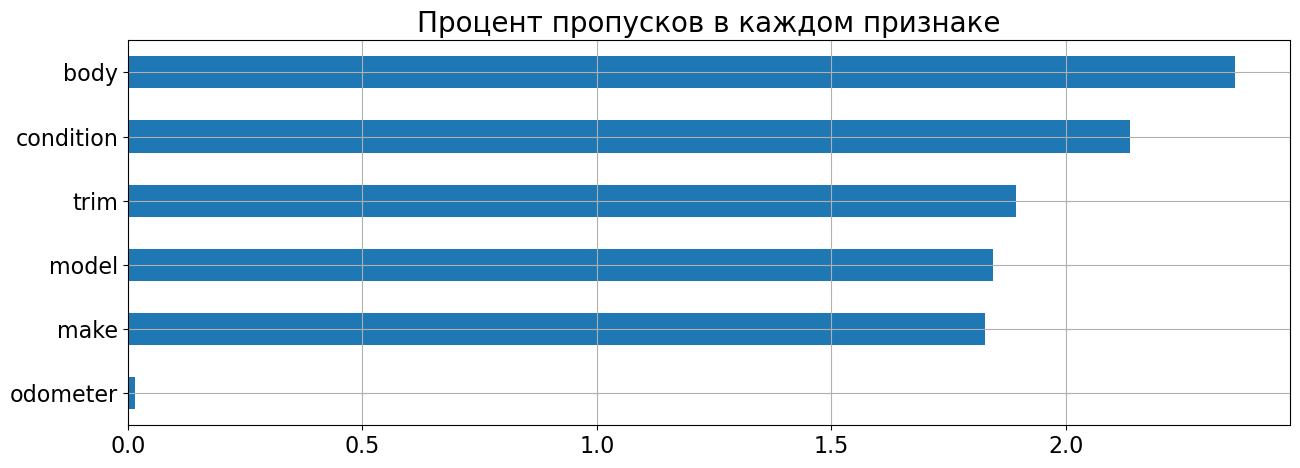

In [24]:
pass_value_barh(data_train)

In [25]:
data_test['transmission'] = data_test.apply(lambda x: fillna_transmission(x), axis=1)

In [26]:
data_test.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2005,Cadillac,CTS,Base,Sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
1,2014,GMC,Savana Cargo,2500,Van,automatic,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,Fri Feb 27 2015 01:00:00 GMT-0800 (PST)
2,2013,Nissan,Murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,Tue Feb 24 2015 01:30:00 GMT-0800 (PST)
3,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015 02:00:00 GMT-0800 (PST)
4,2013,Nissan,Titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT)


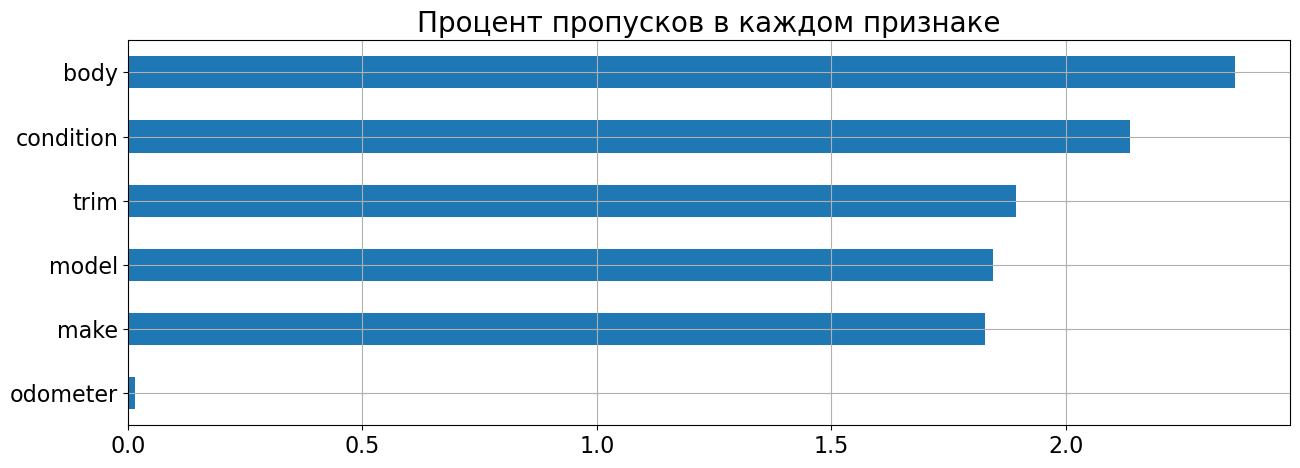

In [27]:
pass_value_barh(data_train)

#### Удаление строк с пропусками.

In [28]:
def loss_share(df):
    old_shape = df.shape[0]
    df = df.dropna()
    new_shape = df.shape[0]
    result = 1 - new_shape / old_shape
    print('Процент удаленных строк:', round(result*100, 2), '%.')
    return df

In [29]:
data_train = loss_share(data_train)

Процент удаленных строк: 4.41 %.


Пропусков не осталось или произошла ошибка в первой части функции 


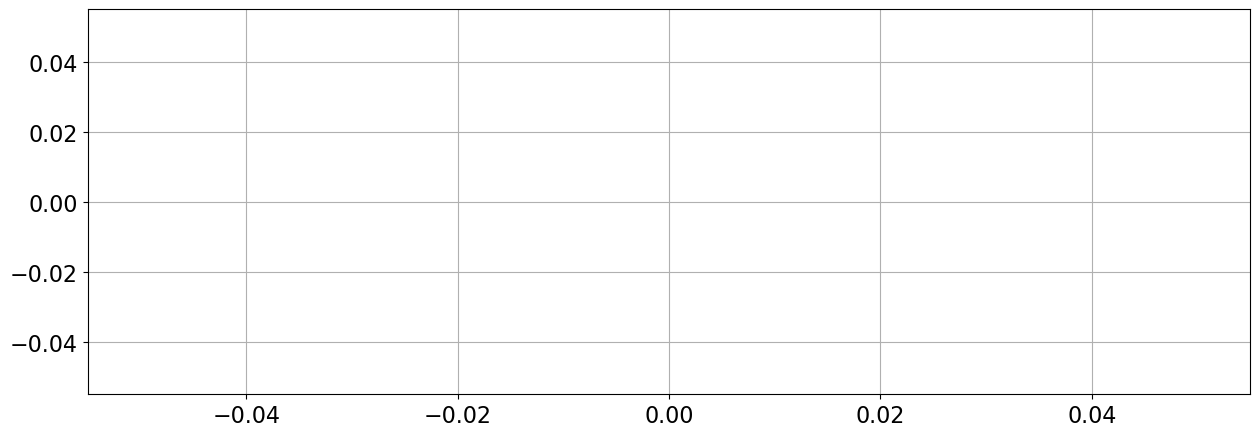

In [30]:
pass_value_barh(data_train)

#### Заполнение пропусков в тестовой выборке

In [31]:
categories=['model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller']

data_test[categories] = data_test[categories].fillna('-1')
data_test = data_test.fillna(-1)

In [32]:
# data_test = loss_share(data_test)

Пропусков не осталось или произошла ошибка в первой части функции 


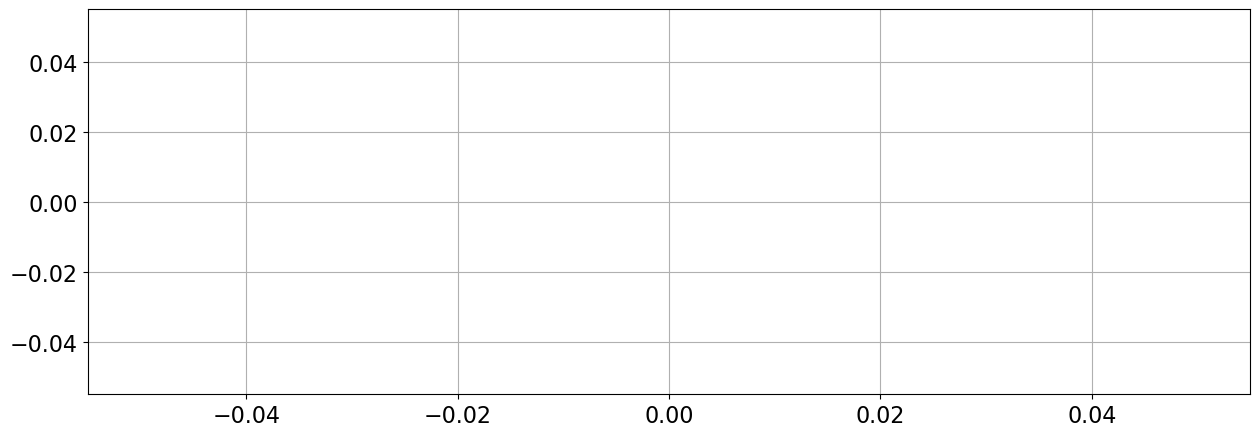

In [33]:
pass_value_barh(data_test)

**Вывод**

После удаления строк с пропуками мы потерыли около 4% данных, что допустимо.

### Изучим дубликаты в датафрейме

Проверим данные на явные дубликаты.

In [34]:
data_train.duplicated().sum(), data_test.duplicated().sum()

(0, 0)

Явных дубликатов нет, поэтому посмотрим на значения в столбцах 'make', 'model', 'trim', 'body'. Видно что в разных строках есть записи в разных регистрих. Приведём всё к нижнему регистру и избавимся таким образом от неявных дубликатов.
Напишем функцию для подсчёта уникальных значений в столбцах, чтобы отследить изменения.

In [35]:
def clean_duplicates(data, columns_names):
    nm_1 = []
    nm_2 = []
    for i in columns_names:
        nm_1.append(len(data[i].unique()))
    data[columns_names] = data[columns_names].apply(lambda x: x.str.lower())
    for i in columns_names:
        nm_2.append(len(data[i].unique()))
    
    dt = pd.DataFrame(data={'Признак': columns_names, 'Кол-во уникальных значений до': nm_1, 'Кол-во уникальных значений после': nm_2})
    return dt

In [36]:
columns_names = ['make', 'model', 'trim', 'body']

clean_duplicates(data_train, columns_names)

,Признак,Кол-во уникальных значений до,Кол-во уникальных значений после
0,make,52,52
1,model,764,760
2,trim,1501,1482
3,body,85,45


In [37]:
clean_duplicates(data_test, columns_names)

,Признак,Кол-во уникальных значений до,Кол-во уникальных значений после
0,make,86,59
1,model,825,747
2,trim,1497,1458
3,body,78,43


???

In [38]:
data_train['model'] = data_train['model'].apply(lambda x: str(x).replace('-', ''))

In [39]:
np.sort(data_train['seller'].unique())
len(data_train['seller'].unique())

11594

**Вывод**



## Добавление новых признаков.

### Работа с датой

Напишем функцию, которая обработает датафреймы и создаст необходимые синтетические признаки из даты продажи: год, месяц, день недели продажи, посчитает возраст машины. Также функция удалит признак 'saledate', он нам больше не понадобится. Также напишем функцию, которая определит был ли день продажи выходным или нет.

In [40]:
def is_weekend(row):
    day = row['weekday']
    if day > 4:
        is_weekend = 1
    else:
        is_weekend = 0
    return is_weekend

In [41]:
def create_signs(df):
    df['sale_year'] = pd.to_datetime(df['saledate'], utc=True).dt.year
    df['sale_month'] = pd.to_datetime(df['saledate'], utc=True).dt.month
    df['weekday'] = pd.to_datetime(df['saledate'], utc=True).dt.weekday
    df['car_age'] = df['sale_year'] - df['year']
    df['is_weekend'] = df.apply(lambda x: is_weekend(x), axis=1)
    df.drop(['saledate'], axis=1, inplace=True)
    return df

In [42]:
create_signs(data_train)
data_train.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,sale_year,sale_month,weekday,car_age,is_weekend
0,2011,ford,edge,sel,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,2015,6,0,4,0
1,2014,ford,fusion,se,sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,2015,2,1,1,0
2,2012,nissan,sentra,2.0 sl,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,2015,6,1,3,0
3,2003,hummer,h2,base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,2015,6,1,12,0
4,2007,ford,fusion,sel,sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,2015,2,0,8,0


In [43]:
create_signs(data_test)
data_test.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sale_year,sale_month,weekday,car_age,is_weekend
0,2005,cadillac,cts,base,sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,2015,1,1,10,0
1,2014,gmc,savana cargo,2500,van,automatic,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,2015,2,3,1,0
2,2013,nissan,murano,s,suv,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,2015,2,0,2,0
3,2013,chevrolet,impala,ls fleet,sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,2015,3,3,2,0
4,2013,nissan,titan,sv,crew cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,2015,6,1,2,0


**Вывод**

Мы создали дополнительные признаки: год, месяц, день недели продажи, возраст машины, а также выходной или будний день был день продажи.

### Посмотрим экстремальные значения

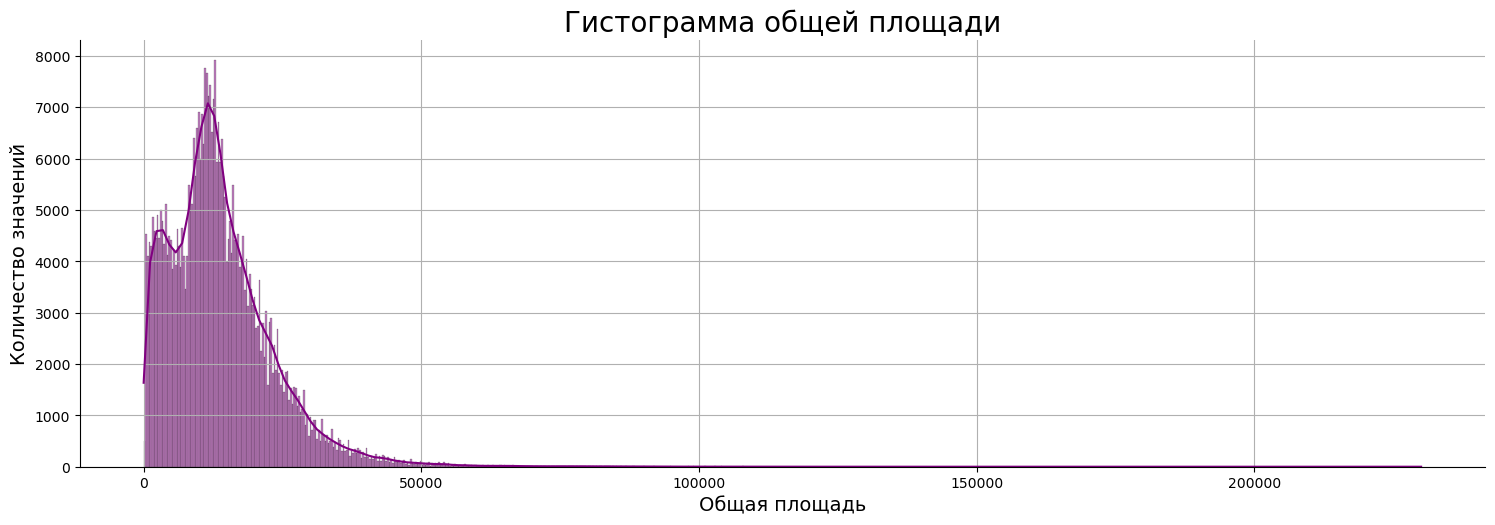

In [44]:
sns.displot(data_train, x='sellingprice', kde=True, color='purple', alpha=0.5,  height= 5 , aspect= 3)
plt.grid(True)
plt.title('Гистограмма общей площади', fontsize=20)
plt.xlabel('Общая площадь', fontsize=14)
plt.ylabel('Количество значений', fontsize=14)
plt.show()

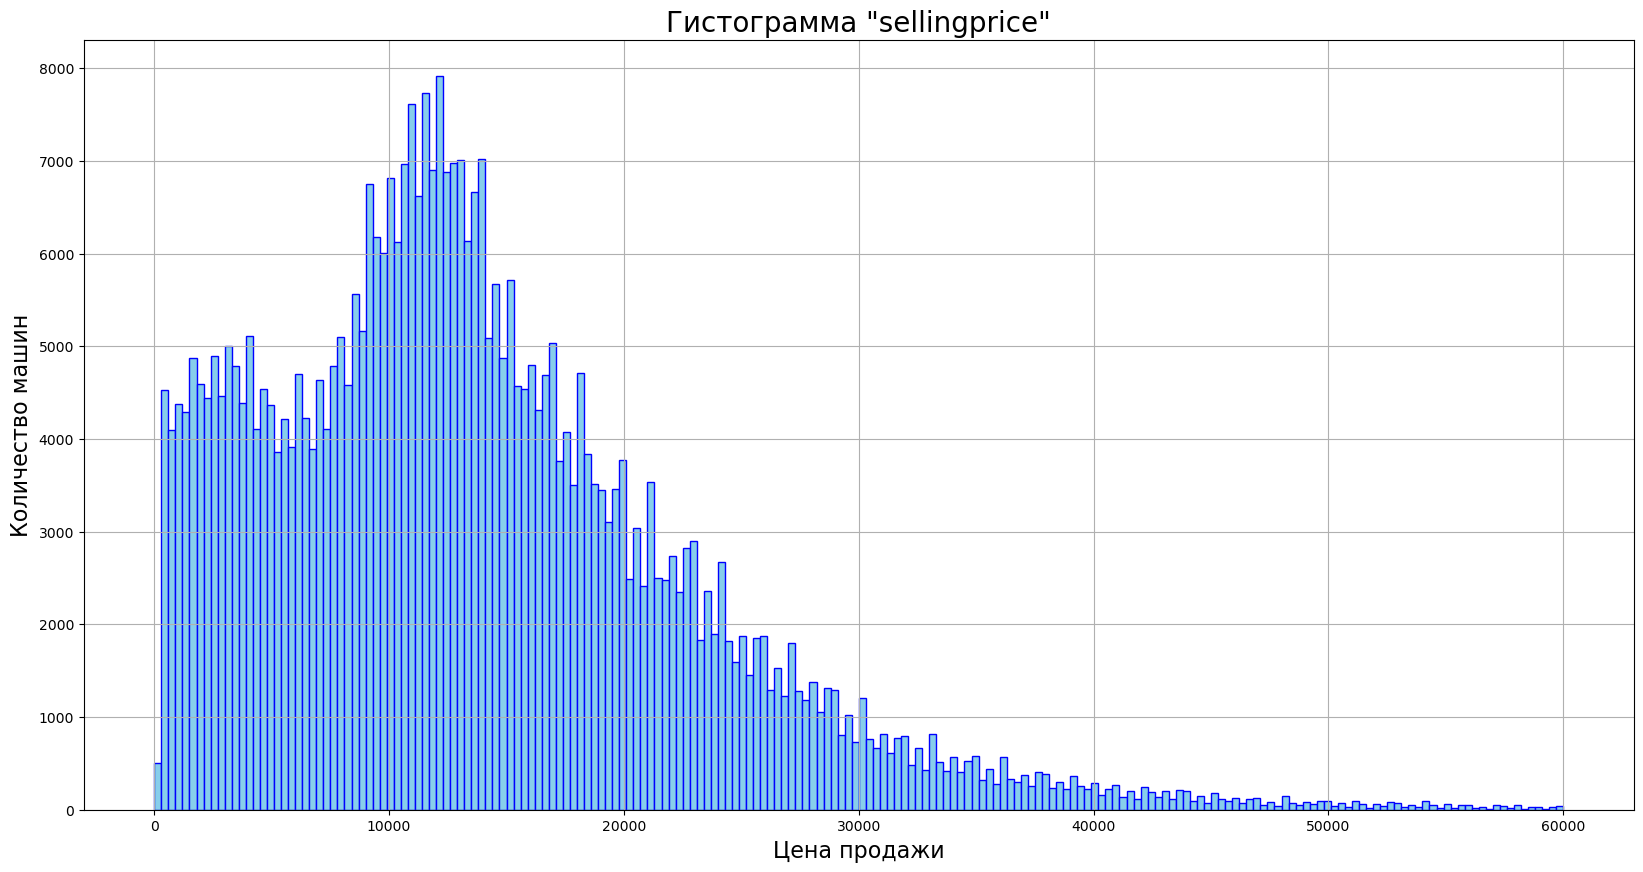

In [45]:
data_train.hist('sellingprice', bins=200, figsize=(20, 10), range=(0, 60000), color='skyblue', edgecolor='blue')
plt.title('Гистограмма "sellingprice"', fontsize=20)
plt.xlabel('Цена продажи', fontsize=16)
plt.ylabel('Количество машин', fontsize=16);

In [46]:
data_train['sellingprice'].quantile(.99), data_train['sellingprice'].quantile(.01)

(44750.0, 500.0)

In [47]:
# (data_train
#          .loc[(data_train['sellingprice']< data_train['sellingprice'].quantile(.99)) & (data_train['sellingprice'] > data_train['sellingprice'].quantile(.01))]
#          .hist('sellingprice', bins=200, figsize=(20, 10), range=(0, 60000), color='skyblue', edgecolor='blue'))
# plt.title('Гистограмма "sellingprice"', fontsize=20)
# plt.xlabel('Цена продажи', fontsize=16)
# plt.ylabel('Количество машин', fontsize=16);

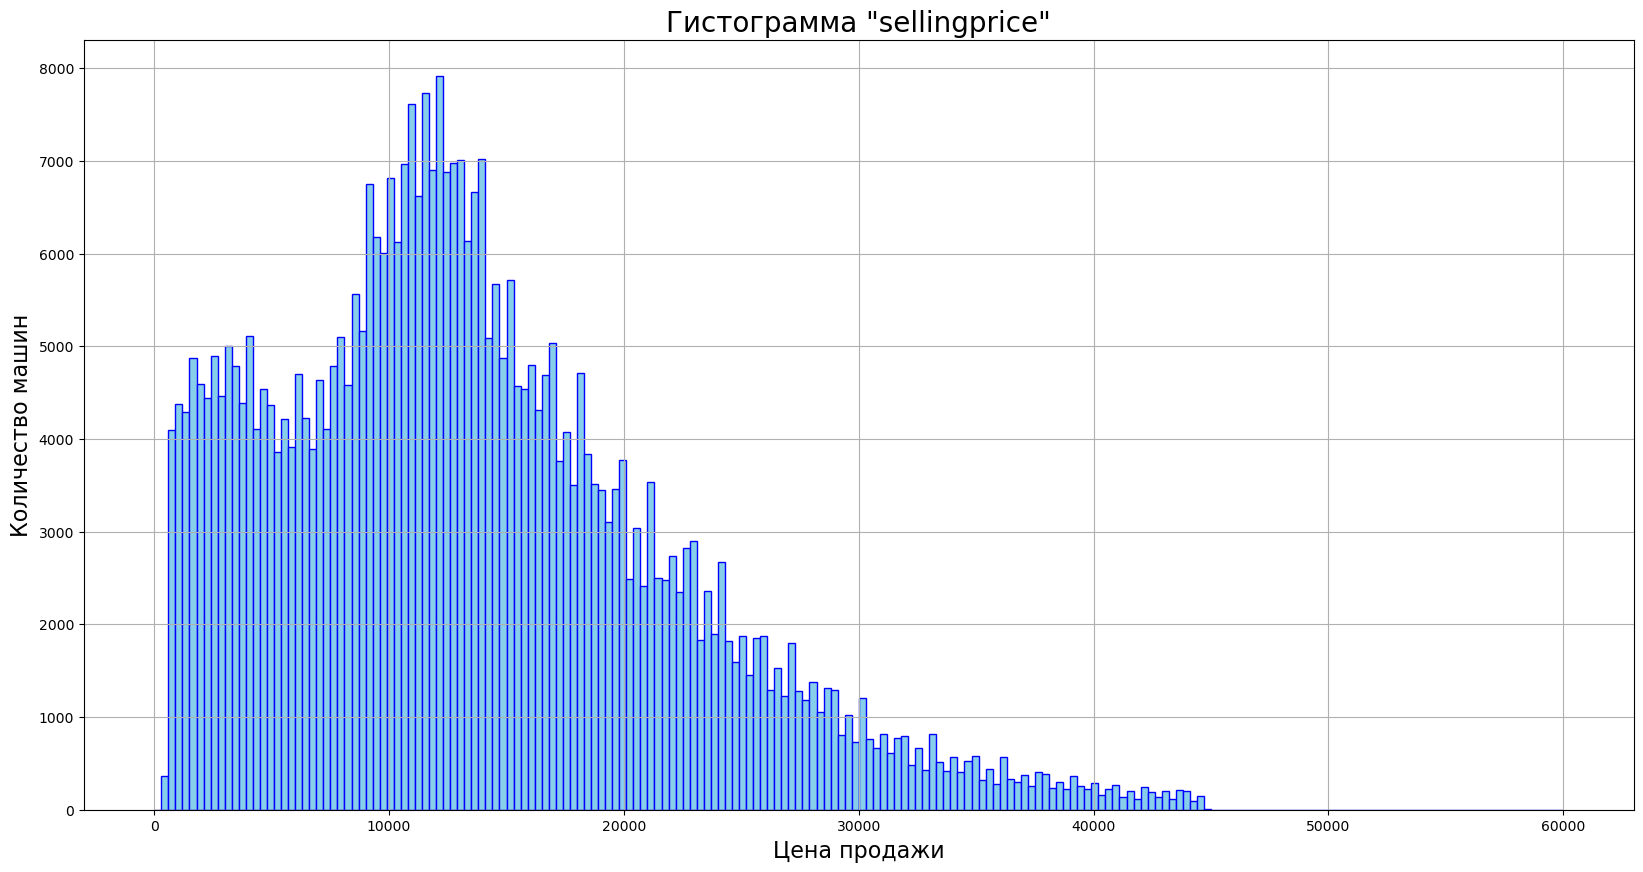

In [48]:
(data_train
         .query("sellingprice.quantile(.01) < sellingprice < sellingprice.quantile(.99)")
         .hist('sellingprice', bins=200, figsize=(20, 10), range=(0, 60000), color='skyblue', edgecolor='blue'))
plt.title('Гистограмма "sellingprice"', fontsize=20)
plt.xlabel('Цена продажи', fontsize=16)
plt.ylabel('Количество машин', fontsize=16);

In [49]:
data_train = data_train.query("sellingprice.quantile(.01) < sellingprice < sellingprice.quantile(.99)")

In [50]:
data_train.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'sellingprice',
       'sale_year', 'sale_month', 'weekday', 'car_age', 'is_weekend'],
      dtype='object')

In [51]:
data_train['odometer'].apply(['mean', 'median', 'min', 'max'])

mean       65602.26471
median     49935.00000
min            1.00000
max       999999.00000
Name: odometer, dtype: float64

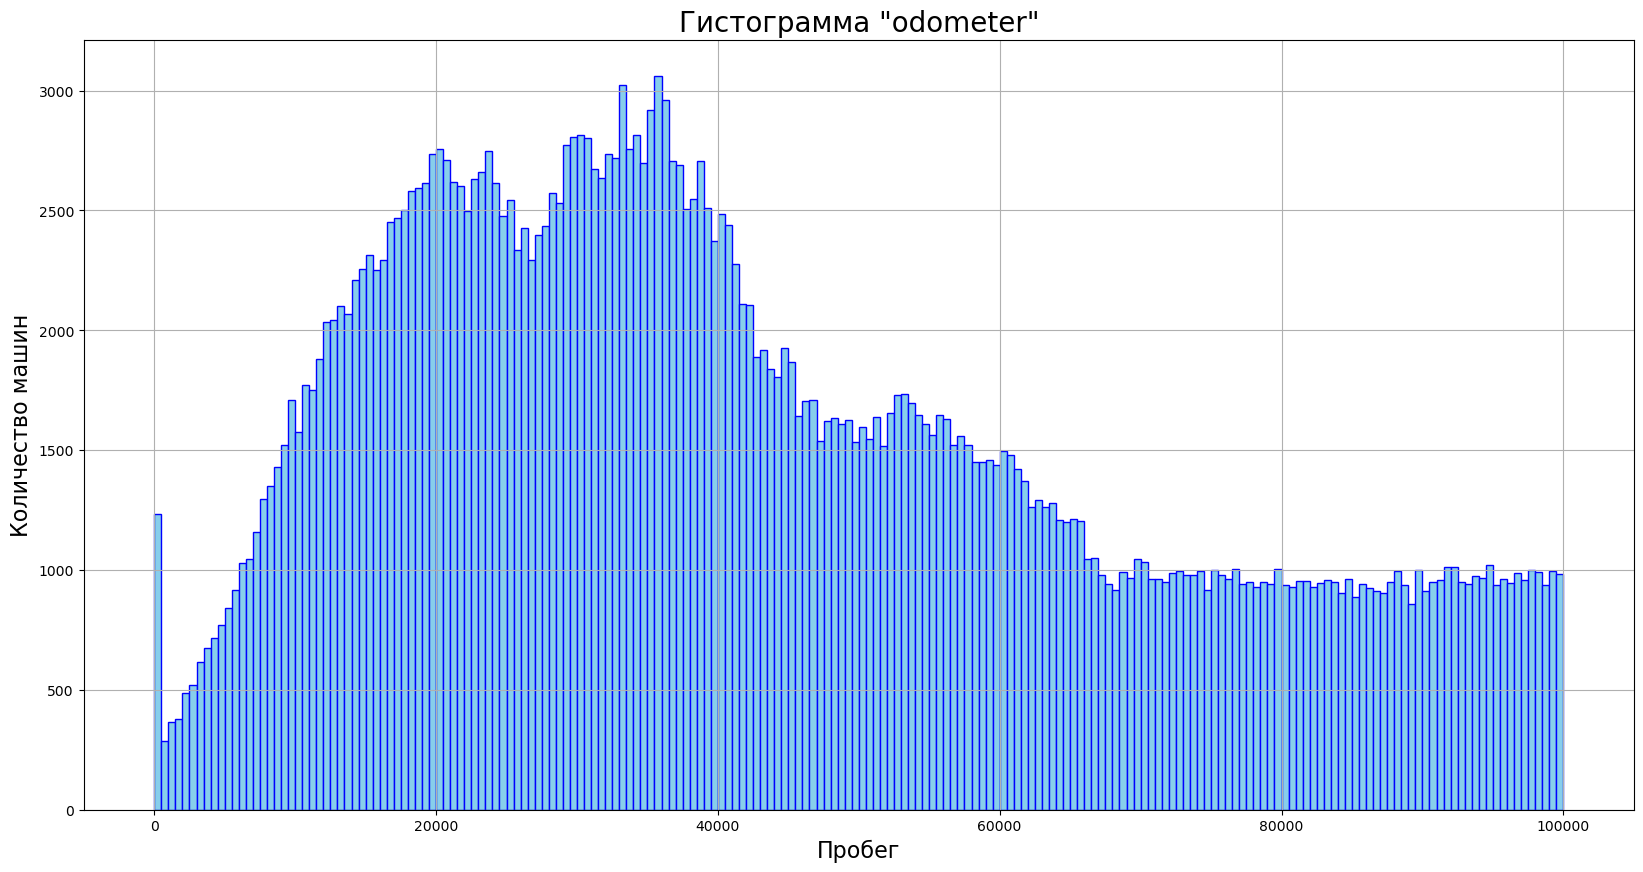

In [52]:
data_train.hist('odometer', bins=200, figsize=(20, 10), range=(0, 100000), color='skyblue', edgecolor='blue')
plt.title('Гистограмма "odometer"', fontsize=20)
plt.xlabel('Пробег', fontsize=16)
plt.ylabel('Количество машин', fontsize=16);

In [53]:
data_train[data_train['odometer'] == 1]['sellingprice'].mode()

0    600
Name: sellingprice, dtype: int64

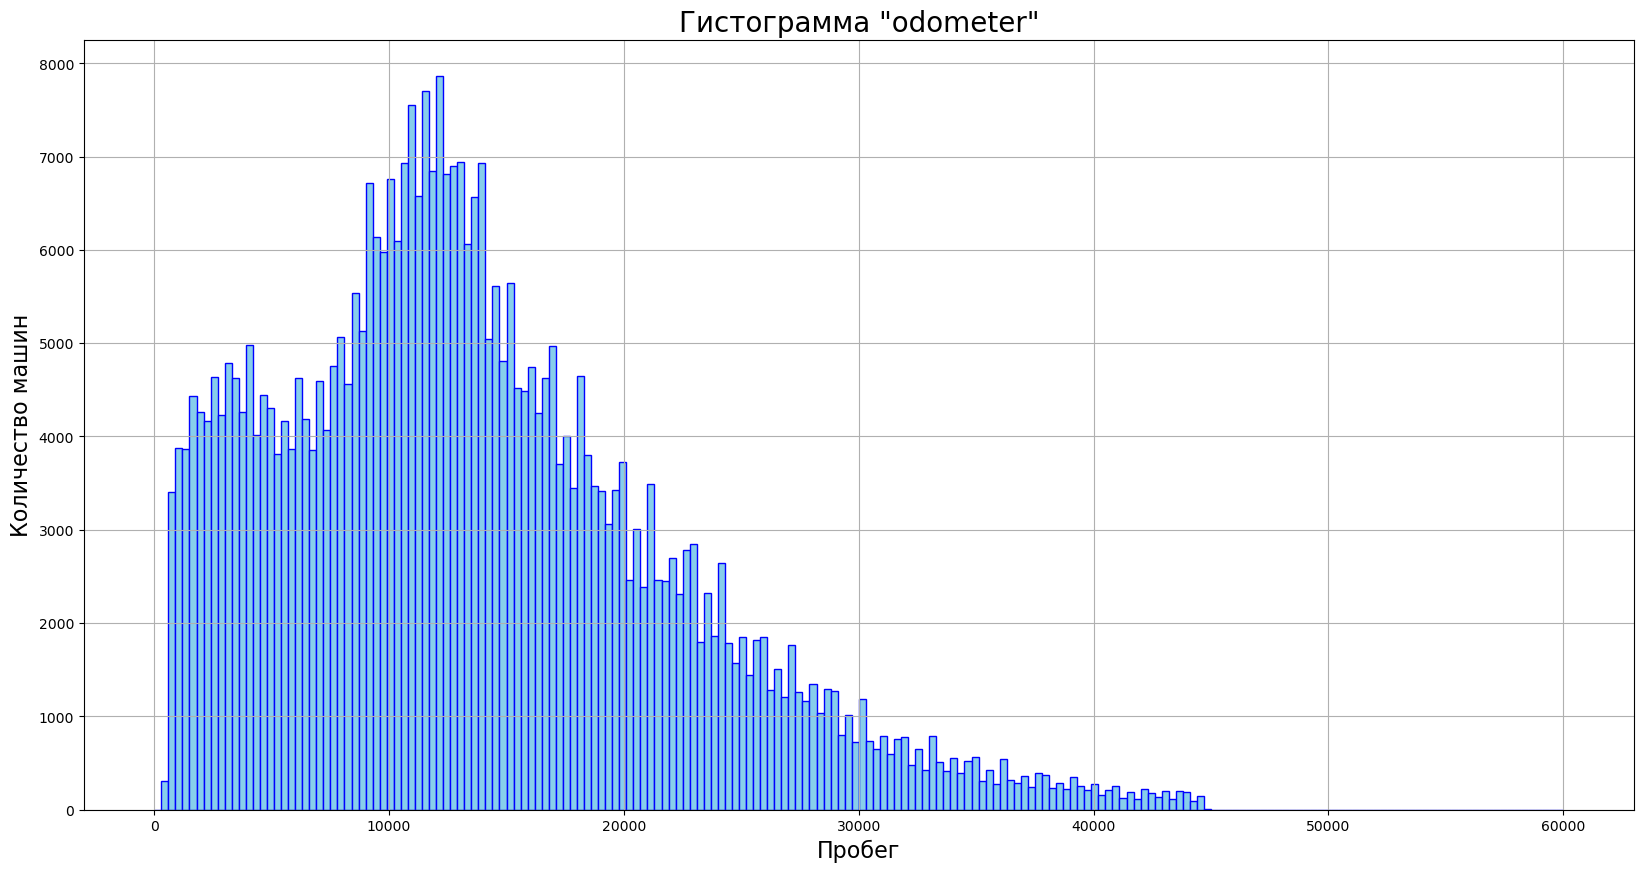

In [54]:
(data_train
         .query("odometer.quantile(.01) < odometer < odometer.quantile(.99)")
         .hist('sellingprice', bins=200, figsize=(20, 10), range=(0, 60000), color='skyblue', edgecolor='blue'))
plt.title('Гистограмма "odometer"', fontsize=20)
plt.xlabel('Пробег', fontsize=16)
plt.ylabel('Количество машин', fontsize=16);

In [55]:
def show_plot(df, columns):
    for i in columns:
        sns.displot(data_train, x=i, kde=True, color='purple', alpha=0.5,  height= 5 , aspect= 3)
        plt.grid(True)
        plt.figsize=(12, 5)
        plt.title(f"Гистограмма {i}", fontsize=20)
        plt.xlabel(f'{i}', fontsize=14)
        plt.ylabel('Количество значений', fontsize=14)
        plt.show();
        (
            df.pivot_table(index=i, values='sellingprice', aggfunc='mean')
            .plot(color='purple', grid=(True), style='o', figsize=(15, 5))
        )
        plt.xlabel(f'{i}')
        plt.ylabel(f'Доля отмены брони')
        plt.title(f'Зависимость доли отмены брони от {i}')
        plt.show();        

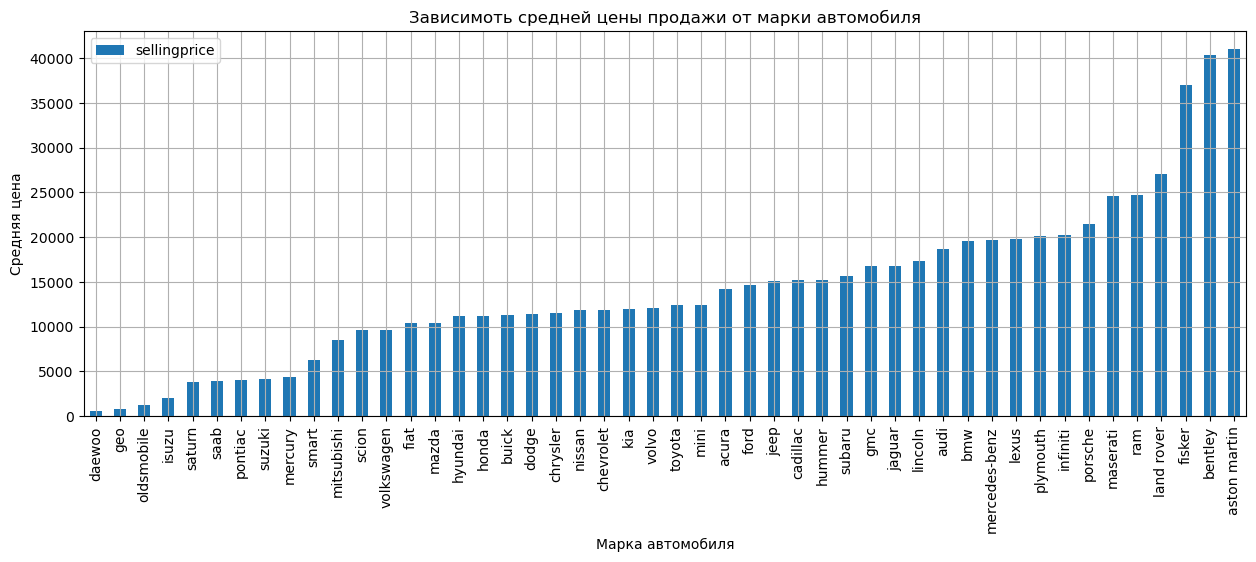

In [56]:
position_make = np.arange(len(data_train['make'].unique()))
fig, ax = plt.subplots()
(
    data_train
    .pivot_table(index='make', values='sellingprice', aggfunc='mean')
    .sort_values(by = ['sellingprice'], ascending = True)
    .plot(kind='bar', grid=(True), figsize=(15, 5), ax=ax)
)

plt.xlabel('Марка автомобиля')
plt.ylabel('Средняя цена')
plt.title('Зависимоть средней цены продажи от марки автомобиля')
ax.set_xticks(position_make)
plt.xticks(rotation=90)
plt.show()

In [57]:
len(data_train['body'].unique())

43

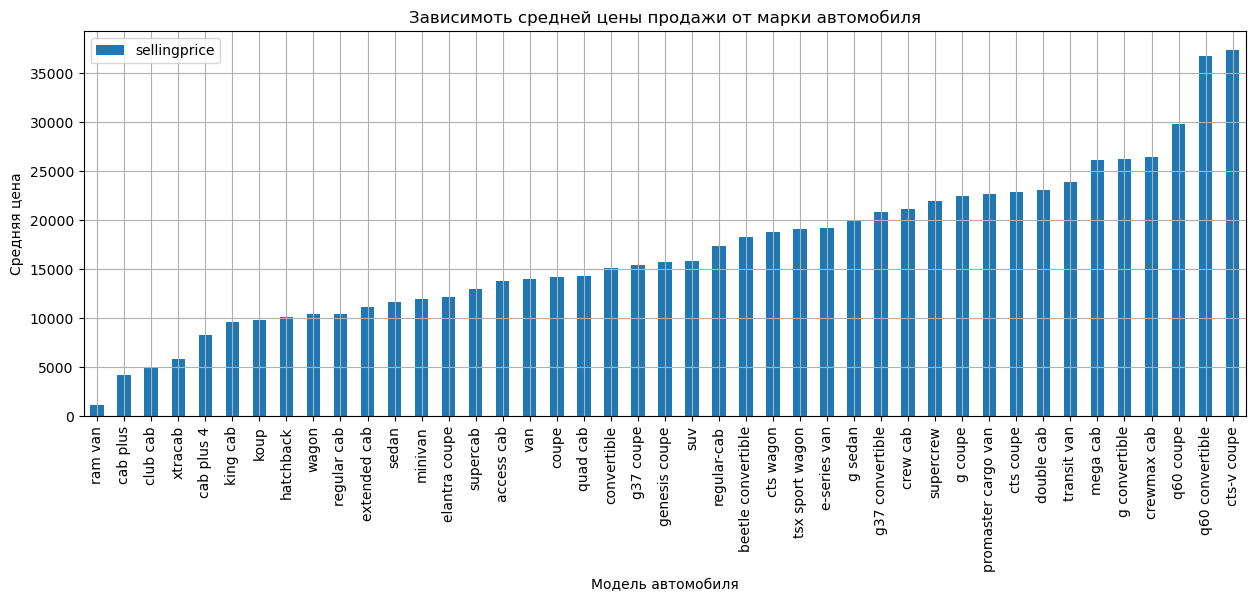

In [58]:
position_body = np.arange(len(data_train['body'].unique()))
fig, ax = plt.subplots()
(
    data_train
    .pivot_table(index='body', values='sellingprice', aggfunc='mean')
    .sort_values(by = ['sellingprice'], ascending = True)
    .plot(kind='bar', grid=(True), figsize=(15, 5), ax=ax)
)

plt.xlabel('Модель автомобиля')
plt.ylabel('Средняя цена')
plt.title('Зависимоть средней цены продажи от марки автомобиля')
ax.set_xticks(position_body)

plt.xticks(rotation=90)
plt.show()

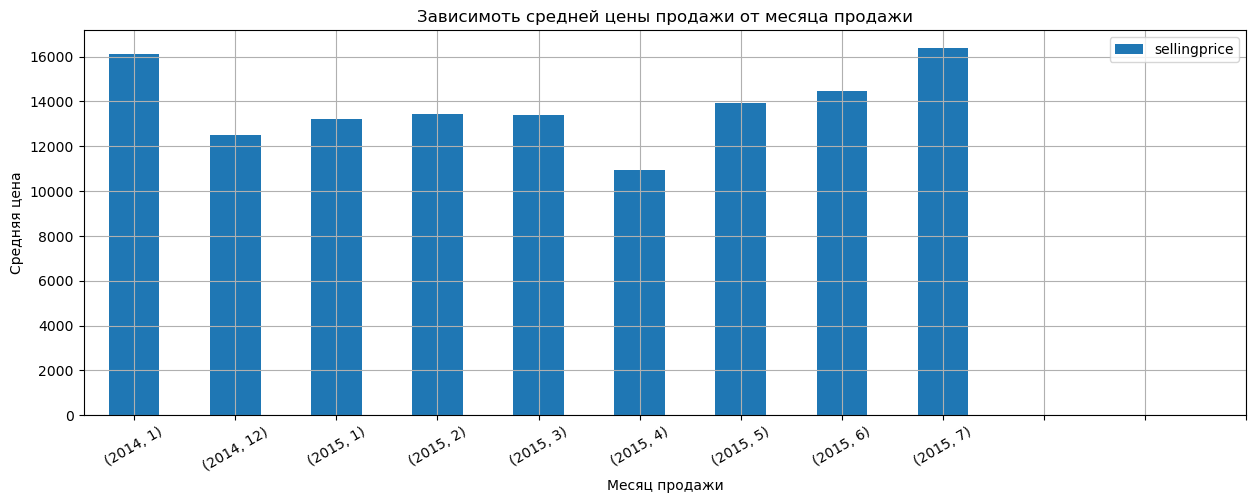

In [59]:
position_month = np.arange(12)
fig, ax = plt.subplots()
(
    data_train
    .pivot_table(index=['sale_year', 'sale_month'], values='sellingprice', aggfunc='mean')
    .plot(kind='bar', grid=(True), figsize=(15, 5), ax=ax)
)

plt.xlabel('Месяц продажи')
plt.ylabel('Средняя цена')
plt.title('Зависимоть средней цены продажи от месяца продажи')
ax.set_xticks(position_month)
#ax.set_xticklabels(['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабря'])
plt.xticks(rotation=30)
plt.show()

## Разделение на features и target

Напишем функцию для разделения выборки на обучающую и валидационную.

In [60]:
data_train.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,sale_year,sale_month,weekday,car_age,is_weekend
0,2011,ford,edge,sel,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,2015,6,0,4,0
1,2014,ford,fusion,se,sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,2015,2,1,1,0
2,2012,nissan,sentra,2.0 sl,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,2015,6,1,3,0
3,2003,hummer,h2,base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,2015,6,1,12,0
4,2007,ford,fusion,sel,sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,2015,2,0,8,0


In [61]:
def split(df):
    #df = df.drop(['saledate'], axis=1)
    #df = df.drop(['year'], axis=1)
    #df = df.drop(['vin'], axis=1)
    target = df['sellingprice']
    features = df.drop(['sellingprice'], axis=1)
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25,
                                                                             random_state=12345)

    print('Размер обучающей выборки:', features_train.shape[0], 'строк')
    print('Размер валидационной выборки:', features_valid.shape[0], 'строк')
    return features_train, features_valid, target_train, target_valid

In [62]:
features_train, features_valid, target_train, target_valid = split(data_train);

Размер обучающей выборки: 308928 строк
Размер валидационной выборки: 102976 строк


In [63]:
features_train_vin = features_train['vin']
features_train = features_train.drop(['vin'], axis=1)

In [64]:
features_valid_vin = features_valid['vin']
features_valid = features_valid.drop(['vin'], axis=1)

In [65]:
# data_test = data_test.drop(subset = 'make', axis=1)

In [66]:
data_test_vin = data_test['vin']
data_test = data_test.drop(['vin'], axis=1)

## Добавление синтетических признаков

Добавим синтетические признаки по цене продажи авто после разделения выборки на учебную и валидационную выборки, чтобы избежать утечки данных о стоимости автомобилей в валидационную выборку.

### Расчёт средней цены продажи по модели, году выпуска и производителю.

In [67]:
# features_train_new = features_train.copy()
# features_train_new['sellingprice'] = target_train
# features_train_new

In [68]:
features_train['sellingprice'] = target_train
features_train

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sale_year,sale_month,weekday,car_age,is_weekend,sellingprice
336387,2012,nissan,altima,2.5,sedan,automatic,fl,2.6,68582.0,silver,black,capital one auto finance,2015,3,1,3,0,10600
219354,2012,ram,1500,st,quad cab,automatic,mi,2.9,94853.0,brown,black,automobiles paille inc,2015,3,2,3,0,13500
83958,2012,nissan,rogue,s,suv,automatic,fl,4.4,27573.0,gray,black,nissan-infiniti lt,2015,6,1,3,0,17400
321359,2012,gmc,sierra 1500,denali,crew cab,automatic,fl,4.1,51795.0,black,black,tdaf remarketing,2015,1,0,3,0,33000
121858,2000,nissan,maxima,gle,sedan,automatic,nj,1.9,169016.0,gold,tan,vw of freehold,2015,1,1,15,0,1400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371412,2002,toyota,corolla,ce,sedan,manual,md,2.0,153930.0,blue,gray,355 toyota,2015,2,0,13,0,850
422553,2011,lexus,is 250,base,sedan,automatic,nj,3.7,69099.0,black,black,lexus financial services,2015,5,1,4,0,17400
419432,2013,ford,focus,se,sedan,automatic,ne,3.9,53833.0,silver,black,dtg operations inc,2015,3,2,2,0,9900
82511,2013,chevrolet,equinox,lt,suv,automatic,mo,4.4,41827.0,black,black,sutton ford/ge,2015,1,2,2,0,16600


In [69]:
mean_sellingprice_per_year = features_train.groupby(['year', 'make', 'model', 'sale_year'])['sellingprice'].mean()
mean_sellingprice_per_year

year  make       model      sale_year
1990  chevrolet  corvette   2015          3900.000000
      lexus      ls 400     2014           700.000000
      mazda      mx5 miata  2015          1650.000000
      nissan     300zx      2015          2300.000000
      toyota     4runner    2015           550.000000
                                             ...     
2015  volvo      s80        2015         27000.000000
                 v60        2014         30000.000000
                            2015         26202.500000
                 xc60       2015         29988.750000
                 xc70       2015         32763.636364
Name: sellingprice, Length: 7522, dtype: float64

In [70]:
def mean_price_per_year(row):
    year = row['year']
    make = row['make']
    model = row['model']
    sale_year = row['sale_year']
    if (year, make, model, sale_year) in mean_sellingprice_per_year.index:
        price_year = mean_sellingprice_per_year.loc[(year, make, model, sale_year)]
    else:
        price_year = np.nan
    row['price_year'] = price_year
    return row['price_year']

In [71]:
# def price_year(row):
#     year = row['year']
#     for i in dm.index:
#         if year == i:
#             row['price_year'] = dm[i]
#     return row['price_year']

In [72]:
%%timeit -n 1 -r 1
features_train['price_year'] = features_train.apply(lambda x: mean_price_per_year(x), axis=1)

2min 6s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [73]:
features_valid.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sale_year,sale_month,weekday,car_age,is_weekend
362807,2008,ford,focus,se,sedan,automatic,nj,2.5,133377.0,silver,tan,holman ford lincoln turnersville,2015,2,1,7,0
400635,2011,gmc,sierra 1500,sle,extended cab,automatic,tx,3.4,39898.0,black,black,td auto finance,2014,12,2,3,0
40210,2013,chevrolet,equinox,lt,suv,automatic,pa,4.8,27784.0,beige,black,auto select inc,2015,6,3,2,0
139058,2014,kia,optima,lx,sedan,automatic,ga,4.4,13525.0,black,gray,"kia motors america, inc",2015,1,3,1,0
122266,2015,bmw,x1,sdrive28i,suv,automatic,nj,4.9,8258.0,brown,black,bmw north america greer,2015,2,0,0,0


In [74]:
%%timeit -n 1 -r 1
features_valid['price_year'] = features_valid.apply(lambda x: mean_price_per_year(x) , axis=1)

42 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [75]:
features_valid.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sale_year,sale_month,weekday,car_age,is_weekend,price_year
362807,2008,ford,focus,se,sedan,automatic,nj,2.5,133377.0,silver,tan,holman ford lincoln turnersville,2015,2,1,7,0,4120.567376
400635,2011,gmc,sierra 1500,sle,extended cab,automatic,tx,3.4,39898.0,black,black,td auto finance,2014,12,2,3,0,19137.500000
40210,2013,chevrolet,equinox,lt,suv,automatic,pa,4.8,27784.0,beige,black,auto select inc,2015,6,3,2,0,15613.286241
139058,2014,kia,optima,lx,sedan,automatic,ga,4.4,13525.0,black,gray,"kia motors america, inc",2015,1,3,1,0,15363.767568
122266,2015,bmw,x1,sdrive28i,suv,automatic,nj,4.9,8258.0,brown,black,bmw north america greer,2015,2,0,0,0,32744.285714


#### Формирование синтетически признаков для data_test

Перед формирования синтетических признаков для тестовой выборки расчитаем среднюю цену продажи по всей учебной выборке модели, году выпуска и производителю. Таким образом получим большее разнообразие данных.

In [76]:
mean_sellingprice_per_year = data_train.groupby(['year', 'make', 'model', 'sale_year'])['sellingprice'].mean()
mean_sellingprice_per_year

year  make       model            sale_year
1990  chevrolet  c/k 1500 series  2015          9750.000000
                 corvette         2015          3900.000000
      lexus      ls 400           2014           700.000000
                                  2015          1100.000000
      mazda      mx5 miata        2015          1650.000000
                                                   ...     
2015  volvo      s80              2015         27000.000000
                 v60              2014         30000.000000
                                  2015         26391.525424
                 xc60             2015         29974.137931
                 xc70             2015         32708.333333
Name: sellingprice, Length: 7852, dtype: float64

In [77]:
%%timeit -n 1 -r 1
data_test['price_year'] = data_test.apply(lambda x: mean_price_per_year(x), axis=1)

44 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [78]:
data_test.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sale_year,sale_month,weekday,car_age,is_weekend,price_year
0,2005,cadillac,cts,base,sedan,automatic,ca,2.7,116970.0,silver,black,lexus of stevens creek,2015,1,1,10,0,3940.186916
1,2014,gmc,savana cargo,2500,van,automatic,pa,4.4,6286.0,white,gray,u-haul,2015,2,3,1,0,20622.186837
2,2013,nissan,murano,s,suv,automatic,oh,4.6,11831.0,gray,black,nissan-infiniti lt,2015,2,0,2,0,19377.421456
3,2013,chevrolet,impala,ls fleet,sedan,automatic,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,2015,3,3,2,0,10108.006311
4,2013,nissan,titan,sv,crew cab,automatic,tn,2.9,31083.0,black,black,nissan north america inc.,2015,6,1,2,0,23110.714286


### Расчёт средней цены продажи по cостоянию автомобиля.

Сформируем таблицу с расчётом средней стоимости продажи машины в зависимости от её состояния, года продажи, марки машины.

In [79]:
# pmc = features_train.groupby(['year', 'make', 'condition', 'sale_year'])['sellingprice'].mean()
# pmc

In [80]:
# def mean_price_per_condition(row):
#     year = row['year']
#     make = row['make']
#     condition = row['condition']
#     sale_year = row['sale_year']
#     if (year, make, condition, sale_year) in pmc.index:
#         price_mean_condition = pmc.loc[(year, make, condition, sale_year)]
#     else:
#         price_mean_condition = np.nan
#     row['price_mean_condition'] = price_mean_condition
#     return row['price_mean_condition']

In [81]:
# %%timeit -n 1 -r 1
# features_train['price_mean_condition'] = features_train.apply(lambda x: mean_price_per_condition(x), axis=1)

In [82]:
# %%timeit -n 1 -r 1
# features_valid['price_mean_condition'] = features_valid.apply(lambda x: mean_price_per_condition(x) , axis=1)

#### Формирование синтетически признаков для data_test

In [83]:
# pmc = data_train.groupby(['year', 'make', 'condition', 'sale_year'])['sellingprice'].mean()
# pmc

In [84]:
# %%timeit -n 1 -r 1
# data_test['price_mean_condition'] = data_test.apply(lambda x: mean_price_per_condition(x), axis=1)

In [85]:
# data_test.head()

### Расчёт средней цены продажи по пробегу

Напишем функцию для категоризации пробега машины. Новые машины выделим в отдельную категрию. У таких машин пробег равен 1 или очень неначителен.

In [86]:
def categorize_odometer(raw):
    odometer = raw['odometer']
    if odometer <= 50:
        category = 1
    elif odometer <=28000:
        category = 2
    elif odometer <=50000:
        category = 3
    elif odometer <=95000:
        category = 4
    else:
        category = 5
    return category

In [87]:
features_train['odometer_cat'] = features_train.apply(lambda x: categorize_odometer(x), axis=1)

In [88]:
features_valid['odometer_cat'] = features_valid.apply(lambda x: categorize_odometer(x), axis=1)

In [89]:
features_train.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sale_year,sale_month,weekday,car_age,is_weekend,sellingprice,price_year,odometer_cat
336387,2012,nissan,altima,2.5,sedan,automatic,fl,2.6,68582.0,silver,black,capital one auto finance,2015,3,1,3,0,10600,12064.457569,4
219354,2012,ram,1500,st,quad cab,automatic,mi,2.9,94853.0,brown,black,automobiles paille inc,2015,3,2,3,0,13500,20892.364532,4
83958,2012,nissan,rogue,s,suv,automatic,fl,4.4,27573.0,gray,black,nissan-infiniti lt,2015,6,1,3,0,17400,14548.713491,2
321359,2012,gmc,sierra 1500,denali,crew cab,automatic,fl,4.1,51795.0,black,black,tdaf remarketing,2015,1,0,3,0,33000,24261.801242,4
121858,2000,nissan,maxima,gle,sedan,automatic,nj,1.9,169016.0,gold,tan,vw of freehold,2015,1,1,15,0,1400,1538.043478,5


In [90]:
features_valid.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sale_year,sale_month,weekday,car_age,is_weekend,price_year,odometer_cat
362807,2008,ford,focus,se,sedan,automatic,nj,2.5,133377.0,silver,tan,holman ford lincoln turnersville,2015,2,1,7,0,4120.567376,5
400635,2011,gmc,sierra 1500,sle,extended cab,automatic,tx,3.4,39898.0,black,black,td auto finance,2014,12,2,3,0,19137.500000,3
40210,2013,chevrolet,equinox,lt,suv,automatic,pa,4.8,27784.0,beige,black,auto select inc,2015,6,3,2,0,15613.286241,2
139058,2014,kia,optima,lx,sedan,automatic,ga,4.4,13525.0,black,gray,"kia motors america, inc",2015,1,3,1,0,15363.767568,2
122266,2015,bmw,x1,sdrive28i,suv,automatic,nj,4.9,8258.0,brown,black,bmw north america greer,2015,2,0,0,0,32744.285714,2


Сформируем таблицу с расчётом средней стоимости продажи машины в зависимости от пробега, года продажи, мирки машины.

In [91]:
pmo = features_train.groupby(['make', 'odometer_cat', 'sale_year'])['sellingprice'].mean()
pmo

make   odometer_cat  sale_year
acura  1             2014          5050.000000
                     2015         10978.571429
       2             2014         25238.709677
                     2015         23250.239234
       3             2014         20269.473684
                                      ...     
volvo  3             2015         18981.853282
       4             2014         11048.387097
                     2015         10603.082192
       5             2014          2869.117647
                     2015          3515.059445
Name: sellingprice, Length: 392, dtype: float64

In [92]:
def mean_price_per_odometer(row):
    
    make = row['make']
    odometer_cat = row['odometer_cat']
    sale_year = row['sale_year']
    if (make, odometer_cat, sale_year) in pmo.index:
        price_mean_odometer = pmo.loc[(make, odometer_cat, sale_year)]
    else:
        price_mean_odometer = np.nan
    row['price_mean_odometer'] = price_mean_odometer
    return row['price_mean_odometer']

In [93]:
%%timeit -n 1 -r 1
features_train['price_mean_odometer'] = features_train.apply(lambda x: mean_price_per_odometer(x), axis=1)

2min 3s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [94]:
%%timeit -n 1 -r 1
features_valid['price_mean_odometer'] = features_valid.apply(lambda x: mean_price_per_odometer(x) , axis=1)

41.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Снова удалим целевой признак.

In [95]:
features_train = features_train.drop(['sellingprice'], axis=1)

In [96]:
features_train.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sale_year,sale_month,weekday,car_age,is_weekend,price_year,odometer_cat,price_mean_odometer
336387,2012,nissan,altima,2.5,sedan,automatic,fl,2.6,68582.0,silver,black,capital one auto finance,2015,3,1,3,0,12064.457569,4,10790.233529
219354,2012,ram,1500,st,quad cab,automatic,mi,2.9,94853.0,brown,black,automobiles paille inc,2015,3,2,3,0,20892.364532,4,21346.161616
83958,2012,nissan,rogue,s,suv,automatic,fl,4.4,27573.0,gray,black,nissan-infiniti lt,2015,6,1,3,0,14548.713491,2,14764.893224
321359,2012,gmc,sierra 1500,denali,crew cab,automatic,fl,4.1,51795.0,black,black,tdaf remarketing,2015,1,0,3,0,24261.801242,4,17963.725569
121858,2000,nissan,maxima,gle,sedan,automatic,nj,1.9,169016.0,gold,tan,vw of freehold,2015,1,1,15,0,1538.043478,5,4571.472313


In [97]:
features_valid.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sale_year,sale_month,weekday,car_age,is_weekend,price_year,odometer_cat,price_mean_odometer
362807,2008,ford,focus,se,sedan,automatic,nj,2.5,133377.0,silver,tan,holman ford lincoln turnersville,2015,2,1,7,0,4120.567376,5,6433.254362
400635,2011,gmc,sierra 1500,sle,extended cab,automatic,tx,3.4,39898.0,black,black,td auto finance,2014,12,2,3,0,19137.500000,3,23777.083333
40210,2013,chevrolet,equinox,lt,suv,automatic,pa,4.8,27784.0,beige,black,auto select inc,2015,6,3,2,0,15613.286241,2,18248.123892
139058,2014,kia,optima,lx,sedan,automatic,ga,4.4,13525.0,black,gray,"kia motors america, inc",2015,1,3,1,0,15363.767568,2,15496.431775
122266,2015,bmw,x1,sdrive28i,suv,automatic,nj,4.9,8258.0,brown,black,bmw north america greer,2015,2,0,0,0,32744.285714,2,31197.334650


#### Формирование синтетически признаков для data_test

In [98]:
data_train['odometer_cat'] = data_train.apply(lambda x: categorize_odometer(x), axis=1)

In [99]:
data_test['odometer_cat'] = data_test.apply(lambda x: categorize_odometer(x), axis=1)

In [100]:
pmo = data_train.groupby(['make', 'odometer_cat', 'sale_year'])['sellingprice'].mean()
pmo

make   odometer_cat  sale_year
acura  1             2014          5050.000000
                     2015         10322.727273
       2             2014         24082.317073
                     2015         23291.906475
       3             2014         20319.600000
                                      ...     
volvo  3             2015         18894.724340
       4             2014         11352.857143
                     2015         10741.609589
       5             2014          3228.804348
                     2015          3478.542510
Name: sellingprice, Length: 400, dtype: float64

In [101]:
%%timeit -n 1 -r 1
data_test['price_mean_odometer'] = data_test.apply(lambda x: mean_price_per_odometer(x), axis=1)

43.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [102]:
data_test.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sale_year,sale_month,weekday,car_age,is_weekend,price_year,odometer_cat,price_mean_odometer
0,2005,cadillac,cts,base,sedan,automatic,ca,2.7,116970.0,silver,black,lexus of stevens creek,2015,1,1,10,0,3940.186916,5,7750.870831
1,2014,gmc,savana cargo,2500,van,automatic,pa,4.4,6286.0,white,gray,u-haul,2015,2,3,1,0,20622.186837,2,25171.856061
2,2013,nissan,murano,s,suv,automatic,oh,4.6,11831.0,gray,black,nissan-infiniti lt,2015,2,0,2,0,19377.421456,2,14745.097458
3,2013,chevrolet,impala,ls fleet,sedan,automatic,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,2015,3,3,2,0,10108.006311,4,11648.900914
4,2013,nissan,titan,sv,crew cab,automatic,tn,2.9,31083.0,black,black,nissan north america inc.,2015,6,1,2,0,23110.714286,3,13582.706195


## Кодирование признаков

In [103]:
# features_categirical = ['transmission', 'state', 'color', 'interior'] #, 'model', 'trim', 'body', 'make']

# ohe = OneHotEncoder(sparse=False, drop='first')
# ohe.fit(features_train[features_categirical])

# def features_ohe(ohe_variable, df_features, features_categ):
#     df_features_ohe = pd.DataFrame(
#         data=ohe_variable.transform(df_features[features_categ]), 
#         index=df_features.index,
#         columns=ohe_variable.get_feature_names_out()
#     )

#     df_features_encoded = df_features.drop(features_categ, axis=1)
#     df_features_encoded = df_features_encoded.join(df_features_ohe)
#     return df_features_encoded    

# features_train_encoded = features_ohe(ohe, features_train, features_categirical);
# features_valid_encoded = features_ohe(ohe, features_valid, features_categirical);
# #test_encoded = features_ohe(ohe, data_test, features_categirical);
# features_train_encoded.head()

Из части с исследованием данных мы выяснили, что в среднем марка машины влияет на её цену. Составим список, в котором марки распределены по возрастанию стоимости. Более недорогим маркам соответсвуют меньшие индексы. Используем список для ручного кодирования признака 'make'.

### Кодирование производителя

In [104]:
make_category = pd.Series((data_train
    .pivot_table(index='make', values='sellingprice', aggfunc='mean')
    .sort_values(by = ['sellingprice'], ascending = True)).index)

make_category

0            daewoo
1               geo
2        oldsmobile
3             isuzu
4            saturn
5              saab
6           pontiac
7            suzuki
8           mercury
9             smart
10       mitsubishi
11            scion
12       volkswagen
13             fiat
14            mazda
15          hyundai
16            honda
17            buick
18            dodge
19         chrysler
20           nissan
21        chevrolet
22              kia
23            volvo
24           toyota
25             mini
26            acura
27             ford
28             jeep
29         cadillac
30           hummer
31           subaru
32              gmc
33           jaguar
34          lincoln
35             audi
36              bmw
37    mercedes-benz
38            lexus
39         plymouth
40         infiniti
41          porsche
42         maserati
43              ram
44       land rover
45           fisker
46          bentley
47     aston martin
Name: make, dtype: object

Напишем функцию, которая создаст новый признак: закодированный производитель.

In [105]:
def make_categorize(row):
    make = row['make']
    if make in make_category.to_list():
        make_cat = make_category.index[make_category== make].tolist()[0]
    else:
        make_cat = -1
    row['make_cat'] = make_cat  
    return row['make_cat']  

In [106]:
features_train['make_cat'] = features_train.apply(lambda x: make_categorize(x), axis=1)

In [107]:
features_valid['make_cat'] = features_valid.apply(lambda x: make_categorize(x), axis=1)

Удалим признак 'make', так как уже заменили его.

In [108]:
features_train = features_train.drop(['make'], axis=1)
features_valid = features_valid.drop(['make'], axis=1)

In [109]:
features_train.head()

,year,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sale_year,sale_month,weekday,car_age,is_weekend,price_year,odometer_cat,price_mean_odometer,make_cat
336387,2012,altima,2.5,sedan,automatic,fl,2.6,68582.0,silver,black,capital one auto finance,2015,3,1,3,0,12064.457569,4,10790.233529,20
219354,2012,1500,st,quad cab,automatic,mi,2.9,94853.0,brown,black,automobiles paille inc,2015,3,2,3,0,20892.364532,4,21346.161616,43
83958,2012,rogue,s,suv,automatic,fl,4.4,27573.0,gray,black,nissan-infiniti lt,2015,6,1,3,0,14548.713491,2,14764.893224,20
321359,2012,sierra 1500,denali,crew cab,automatic,fl,4.1,51795.0,black,black,tdaf remarketing,2015,1,0,3,0,24261.801242,4,17963.725569,32
121858,2000,maxima,gle,sedan,automatic,nj,1.9,169016.0,gold,tan,vw of freehold,2015,1,1,15,0,1538.043478,5,4571.472313,20


In [110]:
features_valid.head()

,year,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sale_year,sale_month,weekday,car_age,is_weekend,price_year,odometer_cat,price_mean_odometer,make_cat
362807,2008,focus,se,sedan,automatic,nj,2.5,133377.0,silver,tan,holman ford lincoln turnersville,2015,2,1,7,0,4120.567376,5,6433.254362,27
400635,2011,sierra 1500,sle,extended cab,automatic,tx,3.4,39898.0,black,black,td auto finance,2014,12,2,3,0,19137.500000,3,23777.083333,32
40210,2013,equinox,lt,suv,automatic,pa,4.8,27784.0,beige,black,auto select inc,2015,6,3,2,0,15613.286241,2,18248.123892,21
139058,2014,optima,lx,sedan,automatic,ga,4.4,13525.0,black,gray,"kia motors america, inc",2015,1,3,1,0,15363.767568,2,15496.431775,22
122266,2015,x1,sdrive28i,suv,automatic,nj,4.9,8258.0,brown,black,bmw north america greer,2015,2,0,0,0,32744.285714,2,31197.334650,36


#### Кодирование тестовой выборки

In [111]:
data_test['make_cat'] = data_test.apply(lambda x: make_categorize(x), axis=1)

Удалим признак 'make', так как уже заменили его.

In [112]:
data_test = data_test.drop(['make'], axis=1)

In [113]:
data_test.head()

,year,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sale_year,sale_month,weekday,car_age,is_weekend,price_year,odometer_cat,price_mean_odometer,make_cat
0,2005,cts,base,sedan,automatic,ca,2.7,116970.0,silver,black,lexus of stevens creek,2015,1,1,10,0,3940.186916,5,7750.870831,29
1,2014,savana cargo,2500,van,automatic,pa,4.4,6286.0,white,gray,u-haul,2015,2,3,1,0,20622.186837,2,25171.856061,32
2,2013,murano,s,suv,automatic,oh,4.6,11831.0,gray,black,nissan-infiniti lt,2015,2,0,2,0,19377.421456,2,14745.097458,20
3,2013,impala,ls fleet,sedan,automatic,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,2015,3,3,2,0,10108.006311,4,11648.900914,21
4,2013,titan,sv,crew cab,automatic,tn,2.9,31083.0,black,black,nissan north america inc.,2015,6,1,2,0,23110.714286,3,13582.706195,20


### Порядковое кодирование остальных признаков

In [114]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoder.fit(features_train)
features_train_encoded = pd.DataFrame(encoder.transform(features_train), columns=features_train.columns)
features_train_encoded.head()

,year,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sale_year,sale_month,weekday,car_age,is_weekend,price_year,odometer_cat,price_mean_odometer,make_cat
0,22.0,61.0,96.0,34.0,0.0,5.0,16.0,61510.0,15.0,1.0,1809.0,1.0,2.0,1.0,4.0,0.0,2928.0,3.0,184.0,20.0
1,22.0,1.0,1127.0,30.0,0.0,13.0,19.0,81625.0,3.0,1.0,886.0,1.0,2.0,2.0,4.0,0.0,4089.0,3.0,314.0,43.0
2,22.0,518.0,947.0,37.0,0.0,5.0,34.0,23765.0,7.0,1.0,6631.0,1.0,5.0,1.0,4.0,0.0,3319.0,1.0,244.0,20.0
3,22.0,562.0,482.0,7.0,0.0,5.0,31.0,46928.0,1.0,1.0,9068.0,1.0,0.0,0.0,4.0,0.0,4381.0,3.0,287.0,32.0
4,10.0,398.0,614.0,34.0,0.0,19.0,9.0,122933.0,6.0,13.0,9898.0,1.0,0.0,1.0,16.0,0.0,295.0,4.0,71.0,20.0


In [115]:
features_valid_encoded = pd.DataFrame(encoder.transform(features_valid), columns=features_valid.columns)
features_valid_encoded.head()

,year,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sale_year,sale_month,weekday,car_age,is_weekend,price_year,odometer_cat,price_mean_odometer,make_cat
0,18.0,255.0,995.0,34.0,0.0,19.0,15.0,107400.0,15.0,13.0,4493.0,1.0,1.0,1.0,8.0,0.0,1235.0,4.0,114.0,27.0
1,21.0,562.0,1053.0,15.0,0.0,33.0,24.0,35880.0,1.0,1.0,9066.0,0.0,7.0,2.0,4.0,0.0,3909.0,2.0,329.0,32.0
2,23.0,215.0,789.0,37.0,0.0,28.0,38.0,23973.0,0.0,1.0,809.0,1.0,5.0,3.0,3.0,0.0,3471.0,1.0,290.0,21.0
3,24.0,449.0,812.0,34.0,0.0,6.0,34.0,10058.0,1.0,6.0,5134.0,1.0,0.0,3.0,2.0,0.0,3438.0,1.0,257.0,22.0
4,25.0,675.0,991.0,37.0,0.0,19.0,39.0,5226.0,3.0,1.0,1408.0,1.0,1.0,0.0,1.0,0.0,4833.0,1.0,365.0,36.0


#### Порядковое кодирование тестовой выборки

In [116]:
# data_test_encoded = pd.DataFrame(encoder.transform(features_valid), columns=features_valid.columns)
# data_test.head()

### Масштабирование признаков

In [117]:
def scaler_func(x, numeric):
    x[numeric].plot(kind='density', figsize=(15, 5), grid=True)
    plt.xlabel('Признаки')
    plt.ylabel('Плотность признака');
    
    x[numeric] = scaler.transform(x[numeric])
    
    x[numeric].plot(kind='density', figsize=(15, 5), grid=True)
    plt.xlabel('Признаки')
    plt.ylabel('Плотность признака')
    return x[numeric]

In [118]:
# scaler = StandardScaler()
# scaler.fit(features_train_encoded[numeric])

In [119]:
# numeric = features_train_encoded.columns

In [120]:
# %%timeit -n 1 -r 1
# features_train_encoded[numeric] = scaler_func(features_train_encoded, numeric)

In [121]:
# %%timeit -n 1 -r 1
# features_valid_encoded[numeric] = scaler_func(features_valid_encoded, numeric)

## Линейная регрессия

In [122]:
model = LinearRegression()

In [123]:
model.fit(features_train_encoded, target_train)

LinearRegression()

In [124]:
predictions = model.predict(features_valid_encoded)

In [125]:
mape(target_valid, predictions)

0.407811219367943

## Дерево решений

In [126]:
# X_train = df.drop('class', axis=1)
# y_train = df['class']

# reg = DecisionTreeRegressor()

# parametrs = { 'max_depth': range (1,13, 2),
#               'min_samples_leaf': range (1,8),
#               'min_samples_split': range (2,10,2),
#               'min_samples_leaf': range (1, 5)}

In [127]:
# grid = GridSearchCV(reg, parametrs, cv=5)
# grid.fit(features_train_encoded, target_train)

In [128]:
# grid.best_params_

In [129]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=12345, max_depth = 10, min_samples_leaf=2)

model.fit(features_train_encoded, target_train)
predictions = model.predict(features_valid_encoded)

mape(target_valid, predictions)

0.21179484512440075

In [130]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=12345, max_depth = 11, min_samples_split=8, min_samples_leaf=3)

model.fit(features_train_encoded, target_train)
predictions = model.predict(features_valid_encoded)

mape(target_valid, predictions)

0.2072248307308254

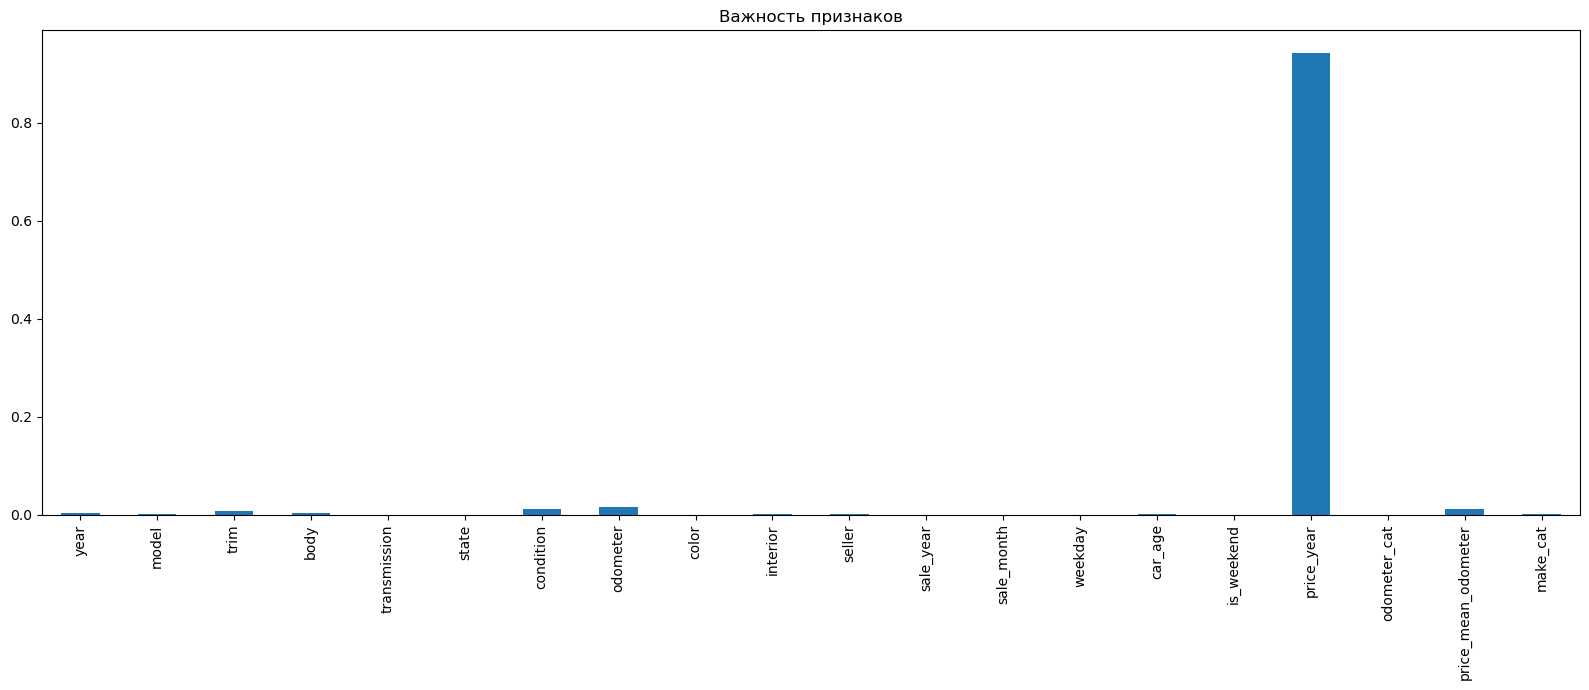

In [131]:
importances = pd.Series(model.feature_importances_,
                         features_train.columns)
fig, ax = plt.subplots(figsize=(16,7))
importances.plot.bar(ax=ax)
ax.set_title("Важность признаков")
fig.tight_layout()

In [132]:
# %%timeit -n 1 -r 1

# best_model = None
# best_mape = 1
# best_depth = 0
# best_sample = 'None'
# for sample in range(1, 20):
#     for depth in range(1, 20):
#         model = DecisionTreeRegressor(random_state=12345, max_depth=depth, 
#                                        min_samples_leaf=sample)
#         model.fit(features_train_encoded, target_train)
#         predictions_valid = model.predict(features_valid_encoded)
#         loc_mape = mape(target_valid, predictions_valid)
#         if loc_mape < best_mape:
#                 best_model = model
#                 best_mape = loc_mape
#                 best_depth = depth
#                 best_sample = sample
# print("F1-мера наилучшей модели на валидационной выборке:", round(best_mape, 3))
# print("Deph, глубина дерева для лучшей модели:", best_depth)
# print("Criterion, критерий разделения:", best_sample)

## Лес решений

In [133]:
# reg = RandomForestRegressor()

# parametrs = { 'n_estimators': range (1, 6, 2),
#               'max_depth': range (1, 13, 2)} #,
#               #'min_samples_leaf': range (1,8) }


In [134]:
# %%timeit
# grid = GridSearchCV(reg, parametrs, cv=5)
# grid.fit(features_train_encoded, target_train)

In [135]:
# grid.best_params_

In [136]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=12345, n_estimators=5, max_depth = 11)

model.fit(features_train_encoded, target_train)
predictions = model.predict(features_valid_encoded)

mape(target_valid, predictions)

0.20087981379862027

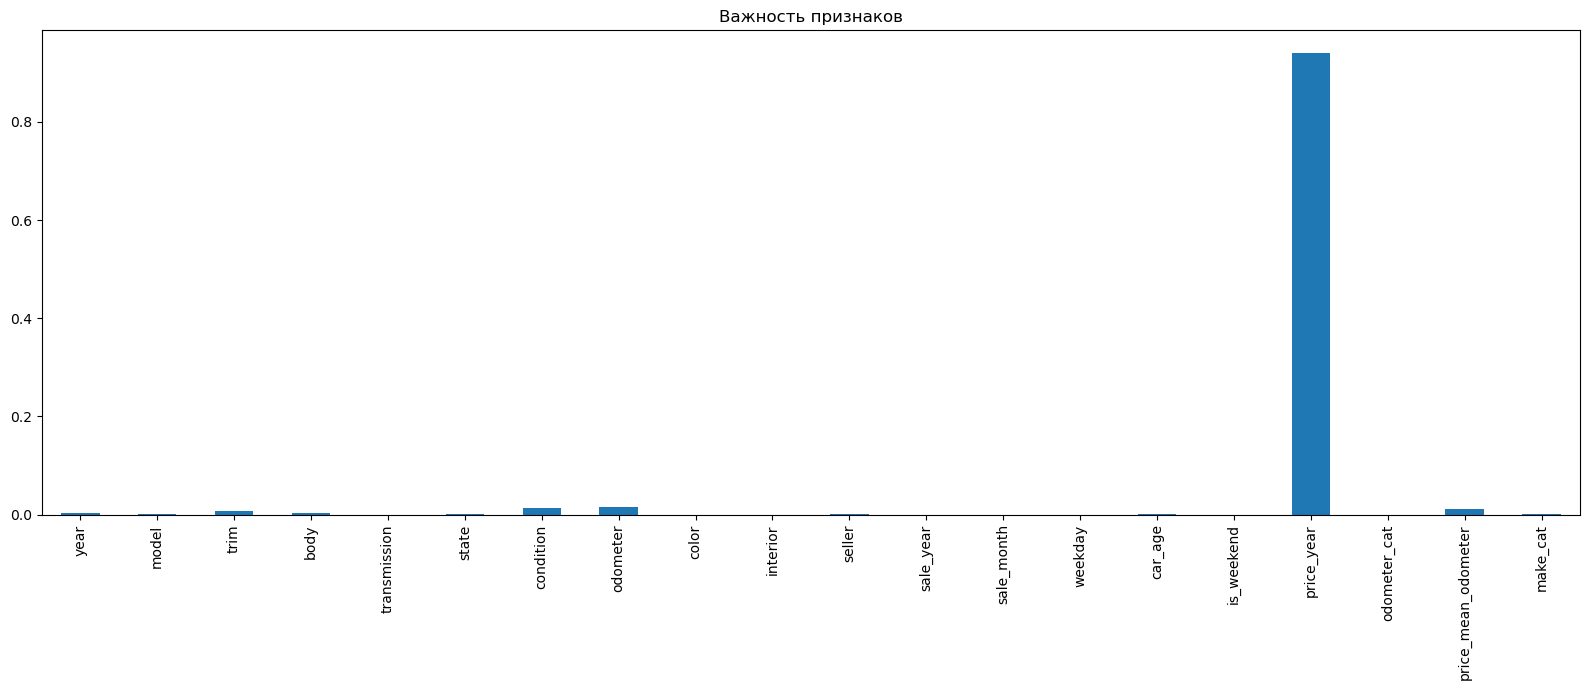

In [137]:
importances = pd.Series(model.feature_importances_,
                         features_train.columns)
fig, ax = plt.subplots(figsize=(16,7))
importances.plot.bar(ax=ax)
ax.set_title("Важность признаков")
fig.tight_layout()

## Catboost

In [138]:
train_data = features_train
train_label = target_train
test_data = features_valid

In [139]:
train_pool = Pool(train_data, 
                  train_label, 
                  cat_features=['model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller'])
test_pool = Pool(test_data, 
                 cat_features=['model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller']) 

In [140]:
model = CatBoostRegressor(iterations=10, 
                          depth=10, 
                          learning_rate=1,
                          score_function= 'L2',
                          loss_function='MAE')

In [141]:
model = CatBoostRegressor(iterations=100, 
                          depth=8, 
                          learning_rate=1,
                          score_function= 'L2',
                          loss_function='MAE')

In [142]:
model.fit(train_pool);

0:	learn: 2876.3389906	total: 277ms	remaining: 27.4s
1:	learn: 2146.8044745	total: 396ms	remaining: 19.4s
2:	learn: 1844.5207806	total: 541ms	remaining: 17.5s
3:	learn: 1758.6971161	total: 665ms	remaining: 16s
4:	learn: 1681.1967633	total: 786ms	remaining: 14.9s
5:	learn: 1605.9261760	total: 909ms	remaining: 14.2s
6:	learn: 1561.6119410	total: 1.03s	remaining: 13.7s
7:	learn: 1531.4079452	total: 1.15s	remaining: 13.2s
8:	learn: 1511.9548429	total: 1.28s	remaining: 12.9s
9:	learn: 1486.6275821	total: 1.4s	remaining: 12.6s
10:	learn: 1476.1663970	total: 1.53s	remaining: 12.4s
11:	learn: 1453.9279628	total: 1.66s	remaining: 12.2s
12:	learn: 1447.0950082	total: 1.79s	remaining: 12s
13:	learn: 1436.8803530	total: 1.91s	remaining: 11.8s
14:	learn: 1425.7207559	total: 2.04s	remaining: 11.5s
15:	learn: 1415.5916837	total: 2.16s	remaining: 11.3s
16:	learn: 1393.5136720	total: 2.29s	remaining: 11.2s
17:	learn: 1369.1860293	total: 2.42s	remaining: 11s
18:	learn: 1358.2060889	total: 2.54s	remainin

In [143]:
preds = model.predict(test_pool)

In [144]:
mape(target_valid, preds)

0.13335980988448054

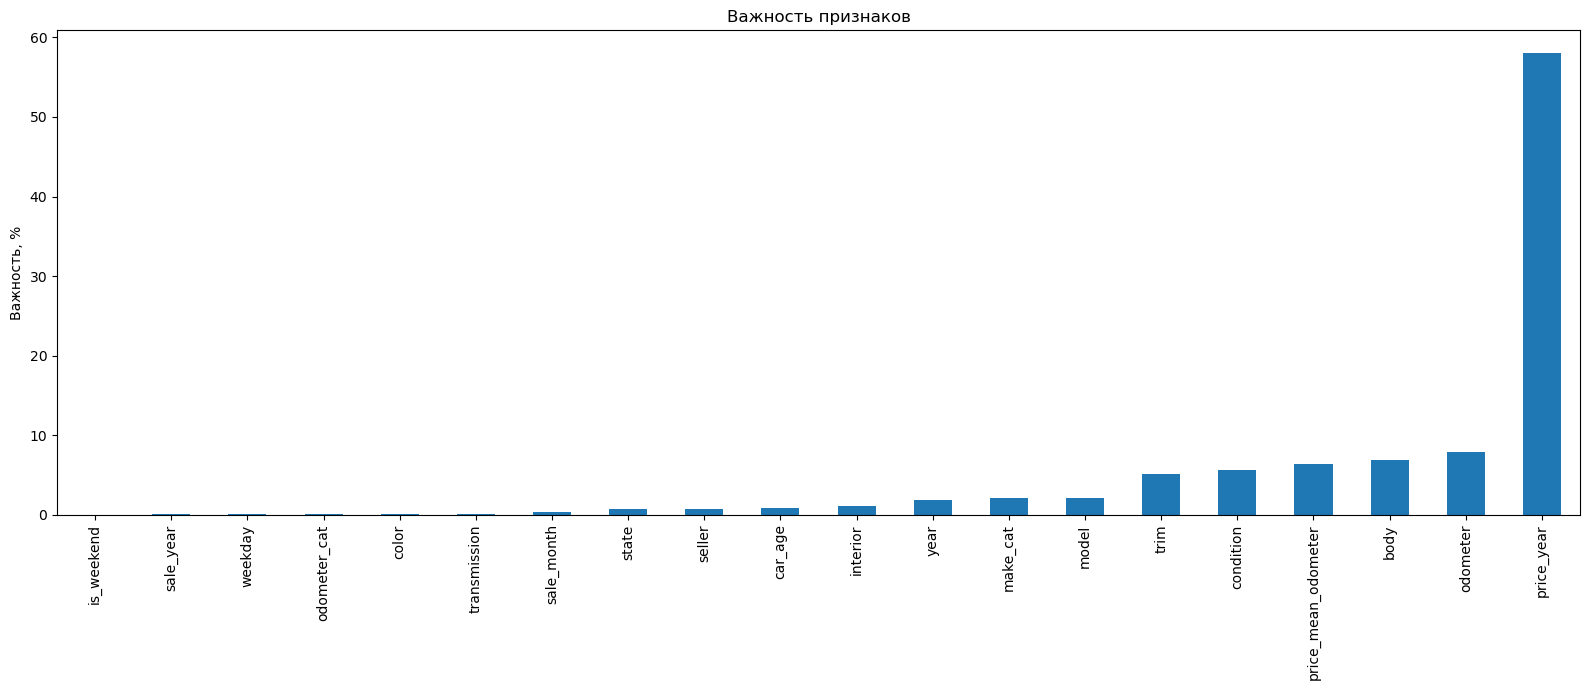

In [145]:
cat_imp = pd.Series(model.get_feature_importance(),
                         features_train.columns).sort_values()
fig, ax = plt.subplots(figsize=(16,7))
cat_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность, %')
fig.tight_layout()

#### Получение прогноза на тестовой выборке

In [146]:
data_test.head()

,year,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sale_year,sale_month,weekday,car_age,is_weekend,price_year,odometer_cat,price_mean_odometer,make_cat
0,2005,cts,base,sedan,automatic,ca,2.7,116970.0,silver,black,lexus of stevens creek,2015,1,1,10,0,3940.186916,5,7750.870831,29
1,2014,savana cargo,2500,van,automatic,pa,4.4,6286.0,white,gray,u-haul,2015,2,3,1,0,20622.186837,2,25171.856061,32
2,2013,murano,s,suv,automatic,oh,4.6,11831.0,gray,black,nissan-infiniti lt,2015,2,0,2,0,19377.421456,2,14745.097458,20
3,2013,impala,ls fleet,sedan,automatic,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,2015,3,3,2,0,10108.006311,4,11648.900914,21
4,2013,titan,sv,crew cab,automatic,tn,2.9,31083.0,black,black,nissan north america inc.,2015,6,1,2,0,23110.714286,3,13582.706195,20


In [147]:
test_pool = Pool(data_test, 
                 cat_features=['model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller']) 

In [148]:
test_preds = model.predict(test_pool)
preds

array([ 3316.3356089 , 17100.16847561, 18520.8299226 , ...,
       41545.32697339, 10970.9140253 ,  2790.17879823])

In [149]:
data_test_predictions = data_test_vin.to_frame()

In [150]:
data_test_predictions['sellingprice'] = test_preds

In [151]:
# data_sample_submission.head()

In [152]:
data_test_predictions

,vin,sellingprice
0,1g6dp567450124779,4609.747356
1,1gtw7fca7e1902207,22083.059439
2,jn8az1mw6dw303497,20454.778328
3,2g1wf5e34d1160703,8992.356212
4,1n6aa0ec3dn301209,26271.988343
...,...,...
110053,1j4aa2d17bl584330,15318.929831
110054,jthbf1d23e5007526,29095.063778
110055,1n4ba41e54c831950,3855.256052
110056,jn1az4eh3dm382431,20670.970119


In [153]:
# data_test_predictions = data_test_predictions.set_index('vin')

In [154]:
data_test_predictions.to_csv(r'C:\Users\Katya\Desktop\ds_learning\14sprint_masterskaya\test_predictions.csv', index= False )

## Общий вывод



**1. Загрузка и объединение данных в один датафрейм**



**2. Предобработка данных**

* Проверка типов данных



* Проверка пропусков в датафрейме


* Проверка дубликатов в датафрейме



* Проверка категориальных значений
 


*  Проверка количественных значений



* Добавление новых столбцов

Мы создали новые столбцы 
1. `year`с информацией о годе проката.
2. `first_director`, `first_genre`с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы вошли первые значения из списка режиссёров и жанров соответственно.
3. `support_share` с долей господдержки в общем бюджете фильма.

**3. Исследовательский анализ данных**

